# <font color='Green'>Telecom Churn Case Study</font>

#### Problem Statement:

**In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.**

**In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.**

 

* *For many incumbent operators, retaining high profitable c*


* *For many incumbent operators, retaining high profitable customers is the number one business goal.*


* *To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.*

# <font color ='green'>Steps :</font>

#### 1. Data Understaning 
    a. Reading the data
    b. Understanding the shape
    c. Formulating the target variable
    d. Indentifying there are missing values present
    
    
#### 2. Data Processing
    a. Missing value treatment by deleting and imputing 
    b. Feature Engineering : Building more meaningful features from the exisiting ones and data trasnformation.
    c. Data Preparation
    
#### 3. Model Building
    a. Dividing the test train data
    b. Scaling the data
    c. Building a good Performance Model
    d. Building a good Interpretable Model
    e. Identifying the crucial variables which are significant to study the churn pattern

# <font color='Blue'>Data Understanding</font>

In [1100]:
# Import all the necessary libraries

# Generic math and dataframe libraries
import pandas as pd 
import numpy as np 

# DateTime 
import datetime

#Logistic Regression libraries
from statsmodels.api import GLM
from sklearn.linear_model import LogisticRegression

# Modeling librarries
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# Random forest and decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [1101]:
# display max rows and max columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [1102]:
# read the churn data available in the csv format
churn_data = pd.read_csv("telecom_churn_data.csv")

In [1103]:
# check the head of the dataframe to get the overview 
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [1104]:
# check the dataframe's shape 
churn_data.shape

(99999, 226)

#### From the above, we can say that there are total 99,999 rows and 226 columns. 

In [1105]:
# describe function on the dataframe
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# <font color='Blue'>Data Cleaning</font>

### a. Deleting unwanted Columns



#### We do not require last dates of the months. Hence we can drop those columns 


In [1106]:
# removing the last date of the month columns
churn_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
               , inplace=True)
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.

### Describing the Churn Phase 

#### The four columns which describe the churners are : 
1.total_ic_mou_9 <br>
2.total_og_mou_9 <br>
3.vol_2g_mb_9 <br>
4.vol_3g_mb_9 <br>

In [1107]:
# lets check if the above four columns have any missing values 
churn_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

#### From the above output, it is clear that there are no missing values for the columns. <br> Hence we can go ahead and create a new variable <b><u>'churn'</u></b> based on the above four columns 

In [1108]:
# the four columns describe whether the customer has churned or not. 
#  creating a target variable 'churn' which takes a boolean value - 0 for non-churn and 1 for churn

churn_data['churn'] = (churn_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0)

In [1109]:
# check the data type of the churn column
churn_data['churn'].dtypes

dtype('bool')

In [1110]:
# converting the churn variable to type int. 
churn_data['churn'] = churn_data['churn'].astype('int32')
churn_data['churn'].dtypes

dtype('int32')

In [1111]:
# value counts on the churn variable
churn_data.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn Percentage')

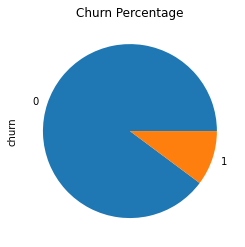

In [1112]:
# visulaizing the churn percentage
fig = (churn_data['churn'].value_counts(1)*100).plot(kind='pie', )
fig.set_title('Churn Percentage')

#### Remove all the other columns which describe the behaviour of the Churn Phase - Month September (9)

In [1113]:
# create a list of all the columns of the dataframe
df_columns = churn_data.columns.to_list()

In [1114]:
# remove all the columns of the September
sept_cols = [x for x in df_columns if ("_9" in x) or ('sep' in x.lower())]
print(len(sept_cols))
sept_cols

54


['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_

In [1115]:
# drop all the above sept cols extracted from the main dataframe
churn_data.drop(columns=sept_cols, inplace=True)
print(churn_data.shape)

churn_data.head()

(99999, 169)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,44,23,30,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.

#### Remove all the columns of the August - action phase since this data will not be availble to us during prediction

In [1116]:
#excracting the Augutst columns
aug_cols = [x for x in df_columns if ("_8" in x) or ('aug' in x.lower())]
print(len(aug_cols))
aug_cols

54


['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_

In [1117]:
# drop all the above aug cols extracted from the main dataframe
churn_data.drop(columns=aug_cols, inplace=True)
print(churn_data.shape)

churn_data.head()

(99999, 115)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,4,3,362,252,252,252,6/21/2014,7/16/2014,252,252,6/21/2014,7/16/2014,1.0,1.0,252.0,252.0,0.0,0.0,1.0,1.0,252.0,252.0,30.13,1.32,83.57,150.76,212.17,212.17,212.17,212.17,0.0,0.0,0,0,0,0,1,1,0,0,1.0,1.0,968,0.0,101.20,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.0,1.83,0.00,0.00,0.00,4,9,74,384,44,154,6/29/2014,7/31/2014,44,23,NaN,7/25/2014,NaN,1.0,NaN,154.0,NaN,1.0,NaN,0.0,NaN,154.0,0.00,108.07,0.00,0.00,NaN,0.00,NaN,28.61,NaN,0.0,0,1,0,0,0,0,0,0,NaN,1.0,1006,0.0,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.0,0.00,0.85,0.93,3.14,5,4,168,315,86,200,6/17/2014,7/24/2014,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,1103,0.0,4.17,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.0,0.00,0.00,0.00,0.00,10,11,230,310,60,50,6/28/2014,7/31/2014,30,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,2491,0.0,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,14

In [1118]:
#checking the values in circle id column
churn_data['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [1119]:
#Dropping the column as all the values are same and have no siginificance 

churn_data.drop(columns=['mobile_number', 'circle_id'], inplace=True)


### b.  Missing Value Treatment

In [1120]:
# Check the number of missing values in each column
churn_data.isnull().sum()

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
arpu_6                          0
arpu_7                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
offnet_mou_6                 3937
offnet_mou_7                 3859
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_og_mou_6                3937
roam_og_mou_7                3859
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2f_mou_6             3937
loc_og_t2f_mou_7             3859
loc_og_t2c_mou_6             3937
loc_og_t2c_mou_7             3859
loc_og_mou_6                 3937
loc_og_mou_7                 3859
std_og_t2t_mou_6             3937
std_og_t2t_mou_7             3859
std_og_t2m_mou_6             3937
std_og_t2m_mou_7             3859
std_og_t2f_mou_6             3937
std_og_t2f_mou_7             3859
std_og_t2c_mou

In [1121]:
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
offnet_mou_6                 3.94
offnet_mou_7                 3.86
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_og_mou_6                3.94
roam_og_mou_7                3.86
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2c_mou_6             3.94
loc_og_t2c_mou_7             3.86
loc_og_mou_6                 3.94
loc_og_mou_7                 3.86
std_og_t2t_mou_6             3.94
std_og_t2t_mou_7             3.86
std_og_t2m_mou_6             3.94
std_og_t2m_mou_7             3.86
std_og_t2f_mou_6             3.94
std_og_t2f_mou_7             3.86
std_og_t2c_mou

In [1122]:
# Subsetof columns related to recharge 
df_columns = churn_data.columns.to_list()
# extract columns which have 'rech' 
rech_cols = [x for x in df_columns if "rech" in x]
print(len(rech_cols))
rech_cols

20


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7']

In [1123]:
round(100*(churn_data[rech_cols].isnull().sum()/len(churn_data[rech_cols])),2)

total_rech_num_6             0.00
total_rech_num_7             0.00
total_rech_amt_6             0.00
total_rech_amt_7             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
total_rech_data_6           74.85
total_rech_data_7           74.43
max_rech_data_6             74.85
max_rech_data_7             74.43
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_3g_6             74.85
count_rech_3g_7             74.43
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
dtype: float64

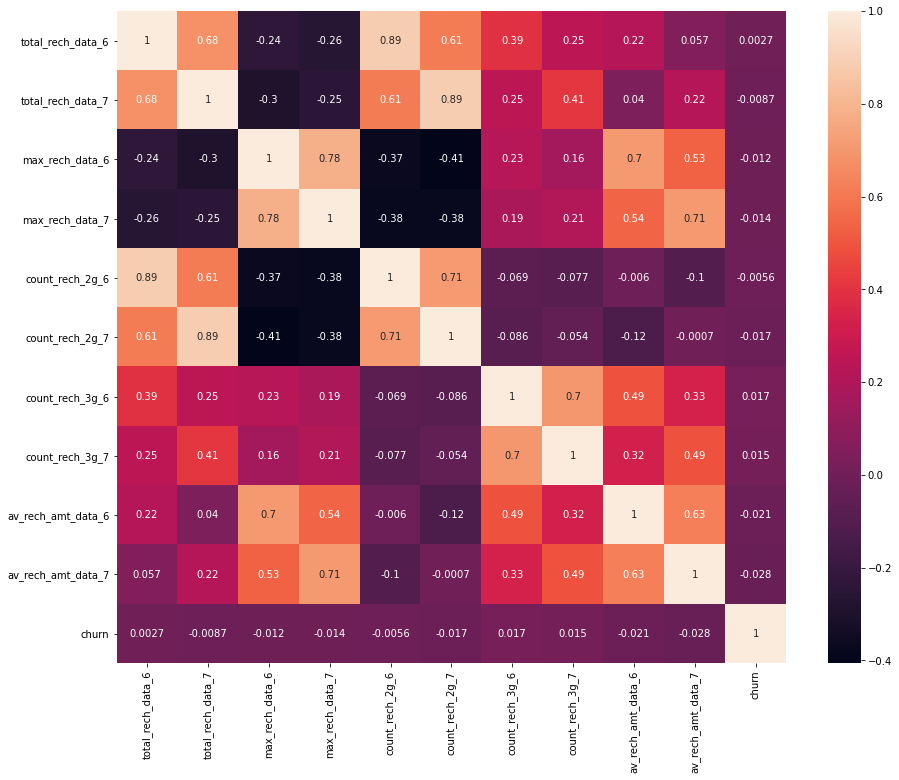

In [1124]:
# correlation between the  columns which have 'rech' keyword and the target variable
data_rec = ['total_rech_data_6',
     'total_rech_data_7',
     'max_rech_data_6',
     'max_rech_data_7',
     'count_rech_2g_6',
     'count_rech_2g_7',
     'count_rech_3g_6',
     'count_rech_3g_7',
     'av_rech_amt_data_6',
     'av_rech_amt_data_7',
     'churn']

plt.figure(figsize=(15,12))
sns.heatmap(churn_data[data_rec].corr(), annot=True)
plt.show()

#### From the above heatmap, we can observe that the columns max_rech_data, count_rech_2g and count_rech_3g have negligible correlation with the target variable and >70% missing values. Hence we can drop them

In [1125]:
churn_data.drop(columns=['max_rech_data_6','max_rech_data_7','count_rech_2g_6',
     'count_rech_2g_7','count_rech_3g_6','count_rech_3g_7'], inplace=True)
churn_data.shape

(99999, 107)

In [1126]:
# getting the list of updated columns
df_columns = churn_data.columns.to_list()

In [1127]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
offnet_mou_6                 3.94
offnet_mou_7                 3.86
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_og_mou_6                3.94
roam_og_mou_7                3.86
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2c_mou_6             3.94
loc_og_t2c_mou_7             3.86
loc_og_mou_6                 3.94
loc_og_mou_7                 3.86
std_og_t2t_mou_6             3.94
std_og_t2t_mou_7             3.86
std_og_t2m_mou_6             3.94
std_og_t2m_mou_7             3.86
std_og_t2f_mou_6             3.94
std_og_t2f_mou_7             3.86
std_og_t2c_mou

In [1128]:
churn_data.loc[(churn_data['churn']==0), ['arpu_3g_6',
'arpu_3g_7',
'arpu_2g_6',
'arpu_2g_7'
]].head(20)

,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7
1,NaN,0.00,NaN,28.61
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,0.0,NaN,0.00,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
8,NaN,0.00,NaN,0.00
9,NaN,0.00,NaN,0.00
10,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN


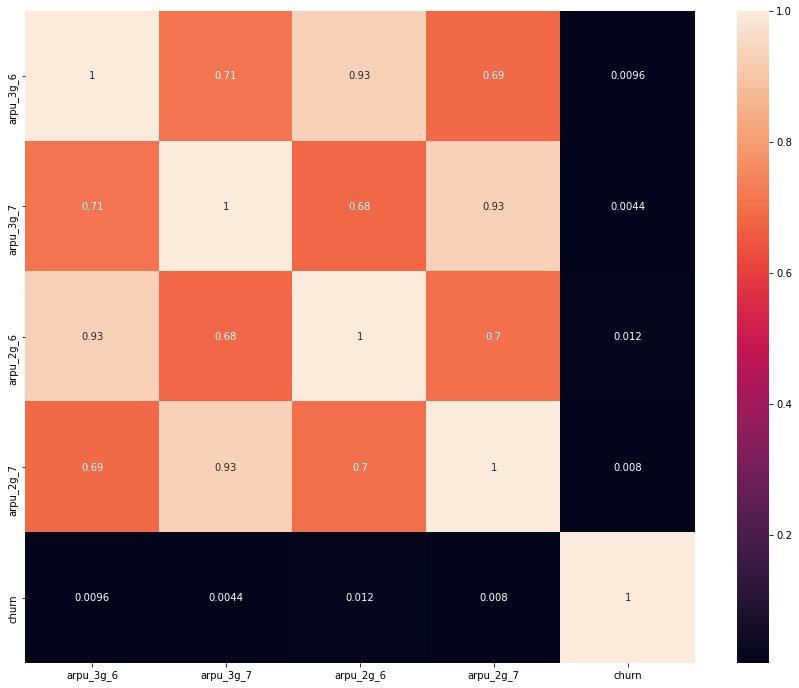

In [1129]:
# correlation between the  columns which have 'rech' keyword and the target variable
data_rech = ['arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'churn']

plt.figure(figsize=(15,12))
sns.heatmap(churn_data[data_rech].corr(), annot=True)
plt.show()

#### From the above heatmap, we can observe that there's not much correlation between the arpu columns and the target variable. Also the missing value % is >70, hence we can drop those columns 

In [1130]:
data_rech = ['arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7']
churn_data.drop(columns=data_rech, inplace=True)
churn_data.shape

(99999, 103)

In [1131]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
offnet_mou_6                 3.94
offnet_mou_7                 3.86
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_og_mou_6                3.94
roam_og_mou_7                3.86
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2c_mou_6             3.94
loc_og_t2c_mou_7             3.86
loc_og_mou_6                 3.94
loc_og_mou_7                 3.86
std_og_t2t_mou_6             3.94
std_og_t2t_mou_7             3.86
std_og_t2m_mou_6             3.94
std_og_t2m_mou_7             3.86
std_og_t2f_mou_6             3.94
std_og_t2f_mou_7             3.86
std_og_t2c_mou

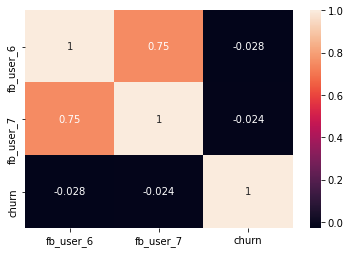

In [1132]:
# check the correlation of the fb_user columns with the target variable churn as the missing value % > 70.
sns.heatmap(churn_data[['fb_user_6','fb_user_7','churn']].corr(), annot=True)
plt.show()

In [1133]:
# Since there's a negligible correlation, we can drop the columns with fb_user
churn_data.drop(columns=['fb_user_6','fb_user_7'], inplace=True)
churn_data.shape

(99999, 101)

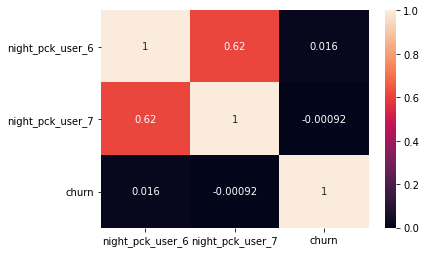

In [1134]:
# check the correlation of the night_pck_user columns with the target variable churn as the missing value % > 70.
sns.heatmap(churn_data[['night_pck_user_6','night_pck_user_7','churn']].corr(), annot=True)
plt.show()

In [1135]:
# Since there's a negligible correlation, we can drop the columns with night_pck_user
churn_data.drop(columns=['night_pck_user_6','night_pck_user_7'], inplace=True)
churn_data.shape

(99999, 99)

In [1136]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
offnet_mou_6                 3.94
offnet_mou_7                 3.86
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_og_mou_6                3.94
roam_og_mou_7                3.86
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2c_mou_6             3.94
loc_og_t2c_mou_7             3.86
loc_og_mou_6                 3.94
loc_og_mou_7                 3.86
std_og_t2t_mou_6             3.94
std_og_t2t_mou_7             3.86
std_og_t2m_mou_6             3.94
std_og_t2m_mou_7             3.86
std_og_t2f_mou_6             3.94
std_og_t2f_mou_7             3.86
std_og_t2c_mou

In [1137]:
#dropping the rows with null valuues in the 'loc_og_t2o_mou' column which has 1% mising values

churn_data = churn_data[~np.isnan(churn_data['loc_og_t2o_mou'])]
churn_data.shape

(98981, 99)

In [1138]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  2.95
onnet_mou_7                  2.87
offnet_mou_6                 2.95
offnet_mou_7                 2.87
roam_ic_mou_6                2.95
roam_ic_mou_7                2.87
roam_og_mou_6                2.95
roam_og_mou_7                2.87
loc_og_t2t_mou_6             2.95
loc_og_t2t_mou_7             2.87
loc_og_t2m_mou_6             2.95
loc_og_t2m_mou_7             2.87
loc_og_t2f_mou_6             2.95
loc_og_t2f_mou_7             2.87
loc_og_t2c_mou_6             2.95
loc_og_t2c_mou_7             2.87
loc_og_mou_6                 2.95
loc_og_mou_7                 2.87
std_og_t2t_mou_6             2.95
std_og_t2t_mou_7             2.87
std_og_t2m_mou_6             2.95
std_og_t2m_mou_7             2.87
std_og_t2f_mou_6             2.95
std_og_t2f_mou_7             2.87
std_og_t2c_mou

In [1139]:
#dropping the rows with null valuues in the 'onnet_mou_6' column which has 2.9% mising values

churn_data = churn_data[~np.isnan(churn_data['onnet_mou_6'])]
churn_data.shape

(96062, 99)

In [1140]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  2.15
offnet_mou_6                 0.00
offnet_mou_7                 2.15
roam_ic_mou_6                0.00
roam_ic_mou_7                2.15
roam_og_mou_6                0.00
roam_og_mou_7                2.15
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             2.15
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             2.15
loc_og_t2f_mou_6             0.00
loc_og_t2f_mou_7             2.15
loc_og_t2c_mou_6             0.00
loc_og_t2c_mou_7             2.15
loc_og_mou_6                 0.00
loc_og_mou_7                 2.15
std_og_t2t_mou_6             0.00
std_og_t2t_mou_7             2.15
std_og_t2m_mou_6             0.00
std_og_t2m_mou_7             2.15
std_og_t2f_mou_6             0.00
std_og_t2f_mou_7             2.15
std_og_t2c_mou

In [1141]:
#dropping the rows with null valuues in the 'onnet_mou_7' column which has 2.15% mising values

churn_data = churn_data[~np.isnan(churn_data['onnet_mou_7'])]
churn_data.shape

(93999, 99)

In [1142]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
arpu_6                       0.00
arpu_7                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2f_mou_6             0.00
loc_og_t2f_mou_7             0.00
loc_og_t2c_mou_6             0.00
loc_og_t2c_mou_7             0.00
loc_og_mou_6                 0.00
loc_og_mou_7                 0.00
std_og_t2t_mou_6             0.00
std_og_t2t_mou_7             0.00
std_og_t2m_mou_6             0.00
std_og_t2m_mou_7             0.00
std_og_t2f_mou_6             0.00
std_og_t2f_mou_7             0.00
std_og_t2c_mou

**Now we have the dataset with most of the columns without null values**

In [1143]:
#printing top 20 rows of 'date_of_last_rech_data_7' and 'date_of_last_rech_data_6' which have 74% missing values
#to understand the date format

churn_data[['date_of_last_rech_data_7', 'date_of_last_rech_data_6']].head(20)

,date_of_last_rech_data_7,date_of_last_rech_data_6
1,7/25/2014,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,6/4/2014
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,7/31/2014,NaN
9,7/23/2014,NaN
11,NaN,NaN


In [1144]:
### Since we are dealing with only 'good', lets take one costant value - starting of the action phase month

last_date = pd.to_datetime('8/1/2014')
last_date

Timestamp('2014-08-01 00:00:00')

In [1145]:
# converting everything to datetime

churn_data['date_of_last_rech_data_6'] = pd.to_datetime(churn_data['date_of_last_rech_data_6'])
churn_data['date_of_last_rech_data_7'] = pd.to_datetime(churn_data['date_of_last_rech_data_7'])
churn_data['date_of_last_rech_6'] = pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_7'] = pd.to_datetime(churn_data['date_of_last_rech_7'])

In [1146]:
# printing top 20 rows of 'date_of_last_rech_7' and 'date_of_last_rech_6' which have 1% missing values

churn_data[['date_of_last_rech_7', 'date_of_last_rech_6']].head(10)

,date_of_last_rech_7,date_of_last_rech_6
1,2014-07-31,2014-06-29
2,2014-07-24,2014-06-17
3,2014-07-31,2014-06-28
4,2014-07-28,2014-06-26
5,2014-07-17,2014-06-19
6,2014-07-31,2014-06-28
7,2014-07-25,2014-06-27
8,2014-07-31,2014-06-25
9,2014-07-23,2014-06-29
11,2014-07-10,2014-06-18


In [1147]:
# imputing the missing values in 'date_of_last_rech_7' column with the corresponding values in the
# 'date_of_last_rech_6' column so that the last recharge date of the customer when not found in 7th month
# there's a chance that it can be found in 6th month.

churn_data.loc[pd.isnull(churn_data['date_of_last_rech_7']), 'date_of_last_rech_7'] = churn_data.loc[pd.isnull(churn_data['date_of_last_rech_7']), 'date_of_last_rech_6']

In [1148]:
# imputing the missing values in 'date_of_last_rech_7' with a constant date : '5/31/2014
# as these customers are the ones who have not recharged in the 7th and 6th months.
# The moto behind imputing these values is to get a derived column which gives the number of days since last recharge

churn_data.loc[pd.isnull(churn_data['date_of_last_rech_7']), 'date_of_last_rech_7'] = pd.to_datetime('5/31/2014')

In [1149]:
#creating the derived column 'days_since_last_rech_calls'

churn_data['days_since_last_rech_calls'] = last_date - churn_data['date_of_last_rech_7']
churn_data['days_since_last_rech_calls'] = churn_data['days_since_last_rech_calls'].apply(lambda x : x.days)
churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls
1,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.00,1.83,0.00,0.00,0.00,4,9,74,384,44,154,2014-06-29,2014-07-31,44,23,NaT,2014-07-25,NaN,1.0,NaN,154.0,0.0,108.07,0.0,0.0,0,1,0,0,0,0,0,0,1006,0.0,0.00,0,1
2,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.00,0.00,0.85,0.93,3.14,5,4,168,315,86,200,2014-06-17,2014-07-24,0,200,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1103,0.0,4.17,0,8
3,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.00,0.00,0.00,0.00,0.00,10,11,230,310,60,50,2014-06-28,2014-07-31,30,50,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2491,0.0,0.00,0,1
4,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,67.64,91.88,0.00,0.00,0.0,0.00,117.96,241.33,0.00,0.00,9.31,0.00,0.00,0.00,0.0,0.0,9.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,127.28,241.33,105.68,88.49,106.84,109.54,1.50,0.00,214.03,198.04,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,1.93,0.25,216.44,198.29,0.00,0.00,0.00,0.00,0.48,0.00,5,6,196,350,56,110,2014-06-26,2014-07-28,50,110,2014-06-04,NaT,1.0,NaN,56.0,NaN,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,1526,0.0,0.00,0,4
5,0.0,0.0,0.0,50.258,58.810,50.16,43.63,19.28,13.44,0.0,0.00,0.0,0.00,50.16,43.63,16.39,8.83,0.00,0.00,0.0,0.00,66.56,52.46,0.00,0.00,0.00,0.00,2.88,4.61,0.0,0.0,2.88,4.61,0.0,0.0,0.00,0.00,0.00,0.0,69.44,57.08,28.73,30.03,49.19,57.44,0.00,0.00,77.93,87.48,0.00,0.00,0.00,0.00,77.03,71.06,0.0,0.0,77.03,71.06,155.39,158.76,0.43,0.21,0.00,0.00,0.00,0.00,2,2,120,0,120,0,2014-06-19,2014-07-17,120,0,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1471,0.0,0.00,0,15


In [1150]:
# imputing the missing values in 'date_of_last_rech_data_7' column with the corresponding values in the
# 'date_of_last_rech_data_6' column so that the last recharge date of the customer when not found in 7th month
# there's a chance that it can be found in 6th month.

churn_data.loc[pd.isnull(churn_data['date_of_last_rech_data_7']), 'date_of_last_rech_data_7'] = churn_data.loc[pd.isnull(churn_data['date_of_last_rech_data_7']), 'date_of_last_rech_data_6']

In [1151]:
# imputing the missing values in 'date_of_last_rech_data_7' with a constant date : '5/31/2014
# as these customers are the ones who have not recharged in the 7th and 6th months.
# The moto behind imputing these values is to get a derived column which gives the number of days since last recharge

churn_data.loc[pd.isnull(churn_data['date_of_last_rech_data_7']), 'date_of_last_rech_data_7'] = pd.to_datetime('5/31/2014')

In [1152]:
#creating the derived column 'days_since_last_rech_data'

churn_data['days_since_last_rech_data'] = last_date - churn_data['date_of_last_rech_data_7']
churn_data['days_since_last_rech_data'] = churn_data['days_since_last_rech_data'].apply(lambda x: x.days)
churn_data.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,date_of_last_rech_data_6,date_of_last_rech_data_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data
1,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.00,1.83,0.00,0.00,0.00,4,9,74,384,44,154,2014-06-29,2014-07-31,44,23,NaT,2014-07-25,NaN,1.0,NaN,154.0,0.0,108.07,0.0,0.0,0,1,0,0,0,0,0,0,1006,0.0,0.00,0,1,7
2,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.00,0.00,0.85,0.93,3.14,5,4,168,315,86,200,2014-06-17,2014-07-24,0,200,NaT,2014-05-31,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1103,0.0,4.17,0,8,62
3,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.00,0.00,0.00,0.00,0.00,10,11,230,310,60,50,2014-06-28,2014-07-31,30,50,NaT,2014-05-31,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2491,0.0,0.00,0,1,62
4,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,67.64,91.88,0.00,0.00,0.0,0.00,117.96,241.33,0.00,0.00,9.31,0.00,0.00,0.00,0.0,0.0,9.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,127.28,241.33,105.68,88.49,106.84,109.54,1.50,0.00,214.03,198.04,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,1.93,0.25,216.44,198.29,0.00,0.00,0.00,0.00,0.48,0.00,5,6,196,350,56,110,2014-06-26,2014-07-28,50,110,2014-06-04,2014-06-04,1.0,NaN,56.0,NaN,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,1526,0.0,0.00,0,4,58
5,0.0,0.0,0.0,50.258,58.810,50.16,43.63,19.28,13.44,0.0,0.00,0.0,0.00,50.16,43.63,16.39,8.83,0.00,0.00,0.0,0.00,66.56,52.46,0.00,0.00,0.00,0.00,2.88,4.61,0.0,0.0,2.88,4.61,0.0,0.0,0.00,0.00,0.00,0.0,69.44,57.08,28.73,30.03,49.19,57.44,0.00,0.00,77.93,87.48,0.00,0.00,0.00,0.00,77.03,71.06,0.0,0.0,77.03,71.06,155.39,158.76,0.43,0.21,0.00,0.00,0.00,0.00,2,2,120,0,120,0,2014-06-19,2014-07-17,120,0,NaT,2014-05-31,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0,0,0,0,0,0

In [1153]:
# Now that we have derived numeric data from date columns, lets remove those columns 
churn_data.drop(columns=['date_of_last_rech_data_7', 'date_of_last_rech_data_6', 
                         'date_of_last_rech_6', 'date_of_last_rech_7'], inplace=True)

In [1154]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou                 0.00
std_og_t2o_mou                 0.00
loc_ic_t2o_mou                 0.00
arpu_6                         0.00
arpu_7                         0.00
onnet_mou_6                    0.00
onnet_mou_7                    0.00
offnet_mou_6                   0.00
offnet_mou_7                   0.00
roam_ic_mou_6                  0.00
roam_ic_mou_7                  0.00
roam_og_mou_6                  0.00
roam_og_mou_7                  0.00
loc_og_t2t_mou_6               0.00
loc_og_t2t_mou_7               0.00
loc_og_t2m_mou_6               0.00
loc_og_t2m_mou_7               0.00
loc_og_t2f_mou_6               0.00
loc_og_t2f_mou_7               0.00
loc_og_t2c_mou_6               0.00
loc_og_t2c_mou_7               0.00
loc_og_mou_6                   0.00
loc_og_mou_7                   0.00
std_og_t2t_mou_6               0.00
std_og_t2t_mou_7               0.00
std_og_t2m_mou_6               0.00
std_og_t2m_mou_7               0.00
std_og_t2f_mou_6            

In [1155]:
# fill the missing values of the other columns like total_rech_data and av_rech_amt_data with 0
# since NaN here means that the user has not recharged.

churn_data['av_rech_amt_data_6'] = churn_data['av_rech_amt_data_6'].apply(lambda x : 0 if np.isnan(x) else x )
churn_data['av_rech_amt_data_7'] = churn_data['av_rech_amt_data_7'].apply(lambda x : 0 if np.isnan(x) else x )
churn_data['total_rech_data_6'] = churn_data['total_rech_data_6'].apply(lambda x : 0 if np.isnan(x) else x )
churn_data['total_rech_data_7'] = churn_data['total_rech_data_7'].apply(lambda x : 0 if np.isnan(x) else x )

In [1156]:
# check the missing value % again 
round(100*(churn_data.isnull().sum()/len(churn_data)),2)

loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
arpu_6                        0.0
arpu_7                        0.0
onnet_mou_6                   0.0
onnet_mou_7                   0.0
offnet_mou_6                  0.0
offnet_mou_7                  0.0
roam_ic_mou_6                 0.0
roam_ic_mou_7                 0.0
roam_og_mou_6                 0.0
roam_og_mou_7                 0.0
loc_og_t2t_mou_6              0.0
loc_og_t2t_mou_7              0.0
loc_og_t2m_mou_6              0.0
loc_og_t2m_mou_7              0.0
loc_og_t2f_mou_6              0.0
loc_og_t2f_mou_7              0.0
loc_og_t2c_mou_6              0.0
loc_og_t2c_mou_7              0.0
loc_og_mou_6                  0.0
loc_og_mou_7                  0.0
std_og_t2t_mou_6              0.0
std_og_t2t_mou_7              0.0
std_og_t2m_mou_6              0.0
std_og_t2m_mou_7              0.0
std_og_t2f_mou_6              0.0
std_og_t2f_mou_7              0.0
std_og_t2c_mou

In [1157]:
#revisiting the shape

churn_data.shape

(93999, 97)

### The dataset now is free from missing values and unwanted columns 

### c. Getting the list of high value customers

In [1158]:
# get data_recharge amount 

churn_data['data_rech_amt_6'] = (churn_data['total_rech_data_6']*churn_data['av_rech_amt_data_6'])
churn_data['data_rech_amt_7']= (churn_data['total_rech_data_7']*churn_data['av_rech_amt_data_7'])
churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7
1,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.00,1.83,0.00,0.00,0.00,4,9,74,384,44,154,44,23,0.0,1.0,0.0,154.0,0.0,108.07,0.0,0.0,0,1,0,0,0,0,0,0,1006,0.0,0.00,0,1,7,0.0,154.0
2,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.00,0.00,0.85,0.93,3.14,5,4,168,315,86,200,0,200,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1103,0.0,4.17,0,8,62,0.0,0.0
3,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.00,0.00,0.00,0.00,0.00,10,11,230,310,60,50,30,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2491,0.0,0.00,0,1,62,0.0,0.0
4,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,67.64,91.88,0.00,0.00,0.0,0.00,117.96,241.33,0.00,0.00,9.31,0.00,0.00,0.00,0.0,0.0,9.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,127.28,241.33,105.68,88.49,106.84,109.54,1.50,0.00,214.03,198.04,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,1.93,0.25,216.44,198.29,0.00,0.00,0.00,0.00,0.48,0.00,5,6,196,350,56,110,50,110,1.0,0.0,56.0,0.0,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,1526,0.0,0.00,0,4,58,56.0,0.0
5,0.0,0.0,0.0,50.258,58.810,50.16,43.63,19.28,13.44,0.0,0.00,0.0,0.00,50.16,43.63,16.39,8.83,0.00,0.00,0.0,0.00,66.56,52.46,0.00,0.00,0.00,0.00,2.88,4.61,0.0,0.0,2.88,4.61,0.0,0.0,0.00,0.00,0.00,0.0,69.44,57.08,28.73,30.03,49.19,57.44,0.00,0.00,77.93,87.48,0.00,0.00,0.00,0.00,77.03,71.06,0.0,0.0,77.03,71.06,155.39,158.76,0.43,0.21,0.00,0.00,0.00,0.00,2,2,120,0,120,0,120,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1471,0.0,0.00,0,15,62,0.0,0.0


In [1159]:
#calculating the total call reacharge amount for 6th and 7th months

churn_data['call_rech_amt'] = churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']
churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,call_rech_amt
1,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.00,1.83,0.00,0.00,0.00,4,9,74,384,44,154,44,23,0.0,1.0,0.0,154.0,0.0,108.07,0.0,0.0,0,1,0,0,0,0,0,0,1006,0.0,0.00,0,1,7,0.0,154.0,458
2,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.00,0.00,0.85,0.93,3.14,5,4,168,315,86,200,0,200,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1103,0.0,4.17,0,8,62,0.0,0.0,483
3,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.00,0.00,0.00,0.00,0.00,10,11,230,310,60,50,30,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2491,0.0,0.00,0,1,62,0.0,0.0,540
4,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,67.64,91.88,0.00,0.00,0.0,0.00,117.96,241.33,0.00,0.00,9.31,0.00,0.00,0.00,0.0,0.0,9.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,127.28,241.33,105.68,88.49,106.84,109.54,1.50,0.00,214.03,198.04,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,1.93,0.25,216.44,198.29,0.00,0.00,0.00,0.00,0.48,0.00,5,6,196,350,56,110,50,110,1.0,0.0,56.0,0.0,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,1526,0.0,0.00,0,4,58,56.0,0.0,546
5,0.0,0.0,0.0,50.258,58.810,50.16,43.63,19.28,13.44,0.0,0.00,0.0,0.00,50.16,43.63,16.39,8.83,0.00,0.00,0.0,0.00,66.56,52.46,0.00,0.00,0.00,0.00,2.88,4.61,0.0,0.0,2.88,4.61,0.0,0.0,0.00,0.00,0.00,0.0,69.44,57.08,28.73,30.03,49.19,57.44,0.00,0.00,77.93,87.48,0.00,0.00,0.00,0.00,77.03,71.06,0.0,0.0,77.03,71.06,155.39,158.76,0.43,0.21,0.00,0.00,0.00,0.00,2,2,120,0,120,0,120,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1471,0.0,0.00,0,15,62,0.0,0.0,120


In [1160]:
# calculating the total recharge amount ( data + calls )

churn_data['total_rech_amt'] = churn_data['data_rech_amt_6'] + churn_data['data_rech_amt_7'] + churn_data['call_rech_amt']
churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,call_rech_amt,total_rech_amt
1,0.0,0.0,0.0,34.047,355.074,24.11,78.68,15.74,99.84,0.0,0.00,0.0,0.00,23.88,74.56,11.51,75.94,0.00,0.00,0.0,2.91,35.39,150.51,0.23,4.11,0.00,0.46,0.00,0.00,0.0,0.0,0.23,4.58,0.0,0.0,4.68,23.43,0.00,0.0,40.31,178.53,1.61,29.91,17.48,65.38,0.00,8.93,19.09,104.23,0.00,0.00,5.90,0.00,0.00,0.00,0.0,0.0,5.90,0.00,26.83,104.23,0.00,0.00,1.83,0.00,0.00,0.00,4,9,74,384,44,154,44,23,0.0,1.0,0.0,154.0,0.0,108.07,0.0,0.0,0,1,0,0,0,0,0,0,1006,0.0,0.00,0,1,7,0.0,154.0,458,612.0
2,0.0,0.0,0.0,167.690,189.058,11.54,55.24,143.33,220.59,0.0,0.00,0.0,0.00,7.19,28.74,29.34,16.86,24.11,21.79,0.0,135.54,60.66,67.41,4.34,26.49,41.81,67.41,1.48,14.76,0.0,0.0,47.64,108.68,0.0,0.0,46.56,236.84,0.45,0.0,155.33,412.94,115.69,71.11,14.38,15.44,99.48,122.29,229.56,208.86,72.41,71.29,45.18,177.01,21.73,58.34,0.0,0.0,139.33,306.66,370.04,519.53,0.21,0.00,0.00,0.85,0.93,3.14,5,4,168,315,86,200,0,200,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1103,0.0,4.17,0,8,62,0.0,0.0,483,483.0
3,0.0,0.0,0.0,221.338,251.102,99.91,54.39,123.31,109.01,0.0,54.86,0.0,28.09,73.68,34.81,107.43,83.21,1.91,0.65,0.0,0.00,183.03,118.68,26.23,14.89,2.99,1.73,0.00,0.00,0.0,0.0,29.23,16.63,0.0,0.0,10.96,0.00,0.00,0.0,223.23,135.31,62.08,19.98,113.96,64.51,57.43,27.09,233.48,111.59,43.48,66.44,1.33,38.56,1.18,0.00,0.0,0.0,45.99,105.01,280.08,216.61,0.59,0.00,0.00,0.00,0.00,0.00,10,11,230,310,60,50,30,50,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,2491,0.0,0.00,0,1,62,0.0,0.0,540,540.0
4,0.0,0.0,0.0,261.636,309.876,50.31,149.44,76.96,91.88,0.0,0.00,0.0,0.00,50.31,149.44,67.64,91.88,0.00,0.00,0.0,0.00,117.96,241.33,0.00,0.00,9.31,0.00,0.00,0.00,0.0,0.0,9.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,127.28,241.33,105.68,88.49,106.84,109.54,1.50,0.00,214.03,198.04,0.00,0.00,1.93,0.25,0.00,0.00,0.0,0.0,1.93,0.25,216.44,198.29,0.00,0.00,0.00,0.00,0.48,0.00,5,6,196,350,56,110,50,110,1.0,0.0,56.0,0.0,0.0,0.00,0.0,0.0,0,0,1,0,0,0,0,0,1526,0.0,0.00,0,4,58,56.0,0.0,546,602.0
5,0.0,0.0,0.0,50.258,58.810,50.16,43.63,19.28,13.44,0.0,0.00,0.0,0.00,50.16,43.63,16.39,8.83,0.00,0.00,0.0,0.00,66.56,52.46,0.00,0.00,0.00,0.00,2.88,4.61,0.0,0.0,2.88,4.61,0.0,0.0,0.00,0.00,0.00,0.0,69.44,57.08,28.73,30.03,49.19,57.44,0.00,0.00,77.93,87.48,0.00,0.00,0.00,0.00,77.03,71.06,0.0,0.0,77.03,71.06,155.39,158.76,0.43,0.21,0.00,0.00,0.00,0.00,2,2,120,0,120,0,120,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,1471,0.0,0.00,0,15,62,0.0,0.0,120,120.0


In [1161]:
# get the 70 percentile value of the total_rech_amt to get the high valued customers

hvc_rech_amt = churn_data['total_rech_amt'].quantile(q=0.7)
hvc_rech_amt

988.0

In [1162]:
# filter the high value customers from the original dataset
churn_data = churn_data[(churn_data['total_rech_amt']>=hvc_rech_amt)]
churn_data.shape

(28217, 101)

### d. Removing the extra columns

1. total_rech_data_6
2. total_rech_data_7
3. av_rech_amt_data_6
4. av_rech_amt_data_7
5. call_rech_amt	

In [1163]:
#dropping the extra columns created for finding high value customers

churn_data.drop(columns = ['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7','call_rech_amt'],inplace=True)

In [1164]:
temp=churn_data

In [1165]:
#revisiting the shape

churn_data.shape

(28217, 96)

In [1166]:
#descirbing the data after imputation 

churn_data.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
count,28217.0,28217.0,28217.0,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.0,28217.0,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.0,28217.0,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.00000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000,28217.000000
mean,0.0,0.0,0.0,570.172509,573.650022,269.979682,276.447040,385.759052,390.540576,16.563563,13.078944,27.446646,20.844756,87.403141,88.896480,168.629738,168.497988,6.579067,6.650846,1.619322,1.941830,262.620368,264.053865,171.771709,179.376093,185.170565,193.951357,1.849481,1.886125,0.0,0.0,358.795572,375.217376,2.150125,2.154891,5.987224,7.308198,0.677161,0.045216,630.239677,648.787686,67.078421,68.658739,154.818221,156.358733,15.733536,16.534480,237.640040,241.561892,15.297050,15.943121,29.918299,31.681572,2.790926,2.894205,0.0,0.0,48.009949,50.522646,297.961646,305.770134,0.062363,0.019991,11.037153,12.095496,1.203840,1.562369,12.098061,11.959457,674.972534,675.073006,169.296134,172.148138,100.575717,100.605486,129.536886,127.951351,336.57691,365.226259,0.178261,0.186058,1.102385,1.257752,0.212212,0.225325,0.212461,0.231881,1223.358047,182.445134,161.875766,0.074317,4.687990,31.223837,462.929520,539.095835,2352.070895
std,0.0,0.0,0.0,459.020568,484.331990,467.613998,485.708335,489.374413,506.739996,77.347088,77.625549,118.592552,98.294682,233.319168,246.312311,254.038895,245.900621,22.652113,22.431175,6.413234,9.360292,384.311723,382.442872,411.611288,425.533605,416.432348,441.989474,12.132285,13.295131,0.0,0.0,618.668710,648.617473,46.513369,46.817025,17.897450,22.266577,4.201018,2.759712,698.876928,724.722548,164.069164,169.578293,221.133229,221.

#### Since there are few columns with all 0 values, let's remove them as they are not siginificant

In [1167]:
#printing the columns which have all values as 0
churn_data[['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7']].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7
count,28217.0,28217.0,28217.0,28217.0,28217.0,28217.0,28217.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1168]:
#dropping the above columns

churn_data.drop(columns=['loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7'],inplace=True)



In [1169]:
churn_data.shape

(28217, 89)

### e. Checking for class imbalance

Text(0.5, 1.0, 'Churn Percentage')

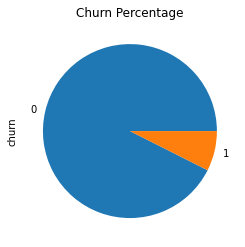

In [1170]:
fig = (churn_data['churn'].value_counts(1)*100).plot(kind='pie', )
fig.set_title('Churn Percentage')

In [1171]:
#checking the ratio of churn and non-churn classes
(churn_data['churn'].value_counts(1)*100)

0    92.56831
1     7.43169
Name: churn, dtype: float64

**Since the ratio of the majority and minority class is ~12:1, the data has high class imbalance and we shall address it while building the model.**

# <font color='Blue'>Data Analysis</font>

### a. Univariate Analysis

In [1172]:
#printing head of the data
churn_data.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
7,1069.180,1349.850,57.84,54.68,453.43,567.16,16.23,33.49,23.74,12.59,51.39,31.38,308.63,447.38,62.13,55.14,0.0,0.0,422.16,533.91,4.30,23.29,49.89,31.76,6.66,20.08,60.86,75.14,0.0,0.18,4.5,0.0,0.0,0.0,487.53,609.24,58.14,32.26,217.56,221.49,152.16,101.46,427.88,355.23,36.89,11.83,91.44,126.99,52.19,34.24,180.54,173.08,626.46,558.04,0.21,0.0,2.06,14.53,15.74,15.19,5,5,1580,790,1580,790,0,0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,802,19.38,18.74,1,7,62,0.0,0.0,2370.0
8,378.721,492.223,413.69,351.03,94.66,80.63,0.00,0.00,0.00,0.00,297.13,217.59,80.96,70.58,0.00,0.00,0.0,0.0,378.09,288.18,116.56,133.43,13.69,10.04,0.00,0.00,130.26,143.48,0.0,0.00,0.0,0.0,0.0,0.0,508.36,431.66,23.84,9.84,57.58,13.98,0.00,0.00,81.43,23.83,0.00,0.58,22.43,4.08,0.00,0.00,22.43,4.66,103.86,28.49,0.00,0.0,0.00,0.00,0.00,0.00,19,21,437,601,90,154,50,0,0.00,356.00,0.0,750.95,0,1,0,1,0,0,0,0,315,910.65,122.16,0,1,1,0.0,354.0,1392.0
21,514.453,597.753,102.41,132.11,757.93,896.68,0.00,0.00,0.00,0.00,4.48,6.16,91.81,87.93,0.75,0.00,0.0,0.0,97.04,94.09,97.93,125.94,665.36,808.74,0.00,0.00,763.29,934.69,0.0,0.00,0.0,0.0,0.0,0.0,860.34,1028.79,2.48,10.19,118.23,74.63,4.61,2.84,125.33,87.68,14.06,5.98,67.69,38.23,0.00,0.00,81.76,44.21,207.09,131.89,0.00,0.0,0.00,0.00,0.00,0.00,22,26,600,680,50,50,30,20,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,720,0.00,0.00,0,1,62,0.0,0.0,1280.0
23,74.350,193.897,48.96,50.66,85.41,89.36,0.00,0.00,0.00,0.00,48.96,50.66,82.94,83.01,0.00,0.00,0.0,0.0,131.91,133.68,0.00,0.00,2.36,6.35,0.00,0.00,2.36,6.35,0.0,0.01,0.1,0.0,0.0,0.0,134.38,140.04,20.71,61.04,95.91,113.36,0.00,0.00,116.63,174.41,0.51,0.00,2.43,14.89,0.00,0.00,2.94,14.89,119.58,222.89,0.00,0.0,0.00,28.23,0.00,5.35,3,5,0,454,0,179,0,179,0.00,0.48,0.0,599.09,0,0,0,0,0,2,0,0,604,51.86,0.00,0,25,25,0.0,712.0,1166.0
33,977.020,2362.833,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,1.75,0.56,0.00,0.00,1.73,0.31,3.48,0.88,0.00,2.91,2.95,1.78,0.23,0.96,3.18,5.66,7.89,7.19,0.00,0.0,0.00,0.00,1.23,0.65,7,14,1058,2806,252,1255,252,0,87.05,57.76,3509.9,8154.65,0,0,0,0,4,5,1,3,1328,2706.83,1714.67,0,2,4,5285.0,20424.0,29573.0


In [1173]:
#checking the data types of the columns
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28217 entries, 7 to 99997
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   arpu_6                      28217 non-null  float64
 1   arpu_7                      28217 non-null  float64
 2   onnet_mou_6                 28217 non-null  float64
 3   onnet_mou_7                 28217 non-null  float64
 4   offnet_mou_6                28217 non-null  float64
 5   offnet_mou_7                28217 non-null  float64
 6   roam_ic_mou_6               28217 non-null  float64
 7   roam_ic_mou_7               28217 non-null  float64
 8   roam_og_mou_6               28217 non-null  float64
 9   roam_og_mou_7               28217 non-null  float64
 10  loc_og_t2t_mou_6            28217 non-null  float64
 11  loc_og_t2t_mou_7            28217 non-null  float64
 12  loc_og_t2m_mou_6            28217 non-null  float64
 13  loc_og_t2m_mou_7            282

In [1174]:
#obtaining those variables which are not much deviating both in case of churn and non-churn
#by taking 0.55 and 0.45 as upper and lower quantiles respectively
less_deviating=[]
for i in sorted(list(churn_data.columns)):
    
    grp1 = churn_data.loc[(churn_data['churn']==0),i]
    grp2 = churn_data.loc[(churn_data['churn']==1),i]
    
    if (i!='churn') and (((grp1.quantile(0.5)<=grp2.quantile(0.55)) and (grp1.quantile(0.5)>=grp2.quantile(0.45)))
    or ((grp2.quantile(0.5)<=grp1.quantile(0.55)) and (grp2.quantile(0.5)>=grp1.quantile(0.45)))):
        
        less_deviating.append(i)
        

print(less_deviating)


['arpu_7', 'ic_others_6', 'ic_others_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'jul_vbc_3g', 'jun_vbc_3g', 'last_day_rch_amt_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'max_rech_amt_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'offnet_mou_7', 'og_others_6', 'og_others_7', 'onnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'sachet_2g_6', 'sachet_2g_7', 'sachet_3g_6', 'sachet_3g_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'std_ic_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2t_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'total_og_mou_7', 'total_rech_amt', 'total_rech_amt_7', 'total_rech_num_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7']


In [1175]:
#obtaining the subset of variables which are not covered in the less deviating variables

var_cols = list(set(sorted(list(churn_data.columns)))-set(less_deviating))

In [1176]:
#obtaining those variables which are deviating moderately in case of churn and non-churn 
#by taking 0.65 and 0.35 as upper and lower quantiles respectively

moderately_deviating=[]
for i in var_cols:
    
    grp1 = churn_data.loc[(churn_data['churn']==0),i]
    grp2 = churn_data.loc[(churn_data['churn']==1),i]
    
    if (i!='churn') and (((grp1.quantile(0.5)<=grp2.quantile(0.65)) and (grp1.quantile(0.5)>=grp2.quantile(0.35)))
    or ((grp2.quantile(0.5)<=grp1.quantile(0.65)) and (grp2.quantile(0.5)>=grp1.quantile(0.35)))):
        
        moderately_deviating.append(i)
        

print(moderately_deviating)


['days_since_last_rech_calls', 'total_rech_amt_6', 'std_ic_t2t_mou_6', 'std_og_t2t_mou_7', 'offnet_mou_6', 'std_og_t2m_mou_6', 'std_ic_mou_6', 'loc_ic_t2t_mou_6', 'total_og_mou_6', 'loc_ic_t2m_mou_6', 'total_rech_num_6', 'last_day_rch_amt_7', 'std_og_mou_7', 'aon', 'loc_og_mou_6', 'data_rech_amt_6', 'total_ic_mou_6', 'arpu_6', 'days_since_last_rech_data', 'data_rech_amt_7', 'loc_og_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_og_t2m_mou_7', 'loc_og_t2m_mou_6', 'max_rech_amt_7', 'loc_ic_mou_6', 'onnet_mou_6']


In [1177]:
#obtaining the subset of variables which were not a part of moderately deviating variables

significantly_deviating = list(set(var_cols)-set(moderately_deviating))
significantly_deviating.remove('churn')
significantly_deviating

['loc_ic_t2f_mou_6',
 'loc_ic_mou_7',
 'loc_og_t2t_mou_7',
 'total_ic_mou_7',
 'std_og_mou_6',
 'loc_og_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'std_og_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_og_mou_7']

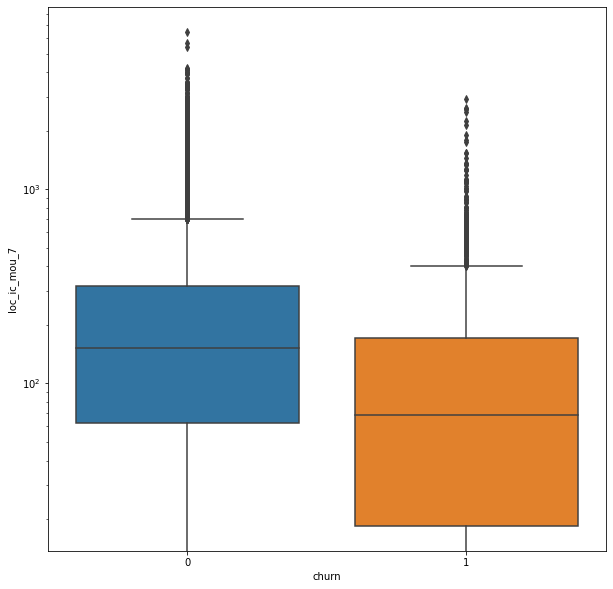

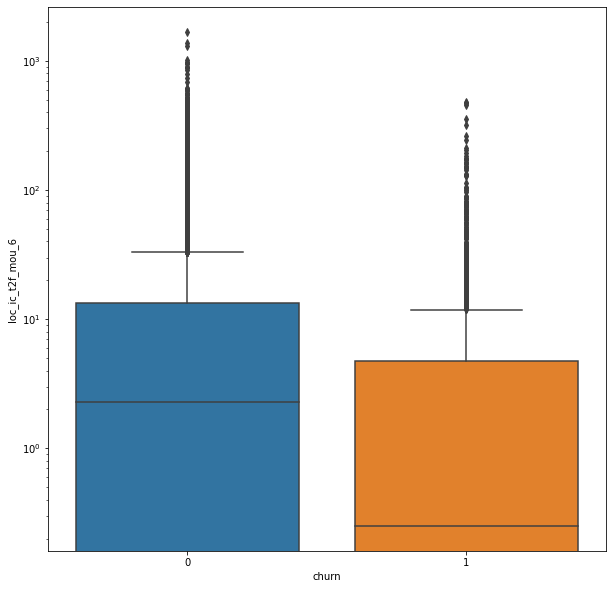

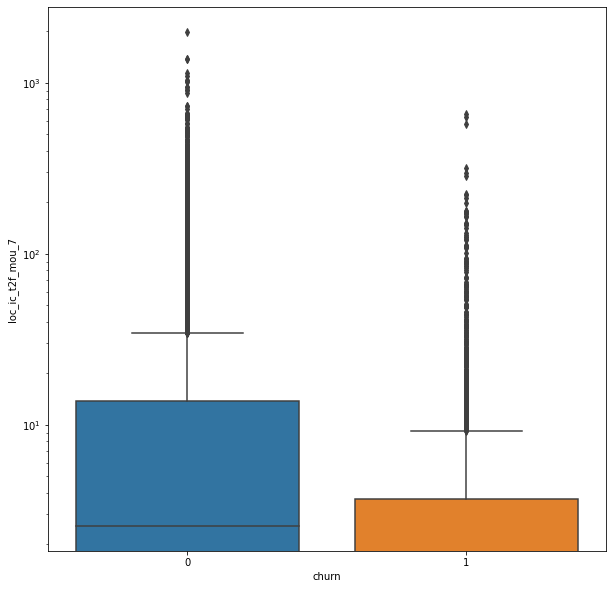

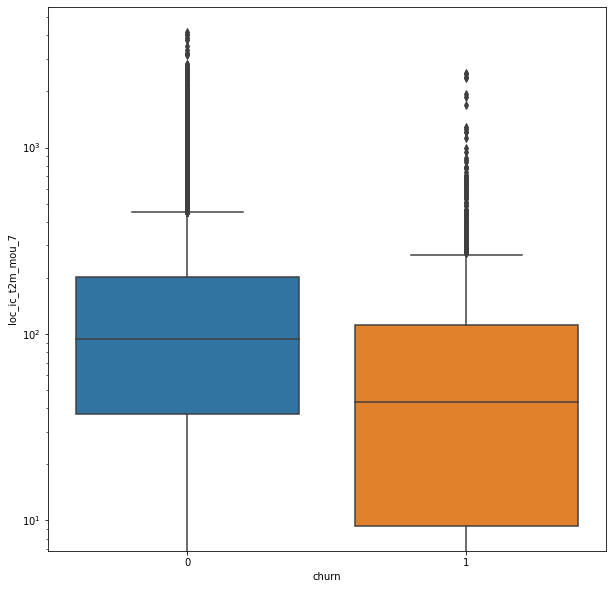

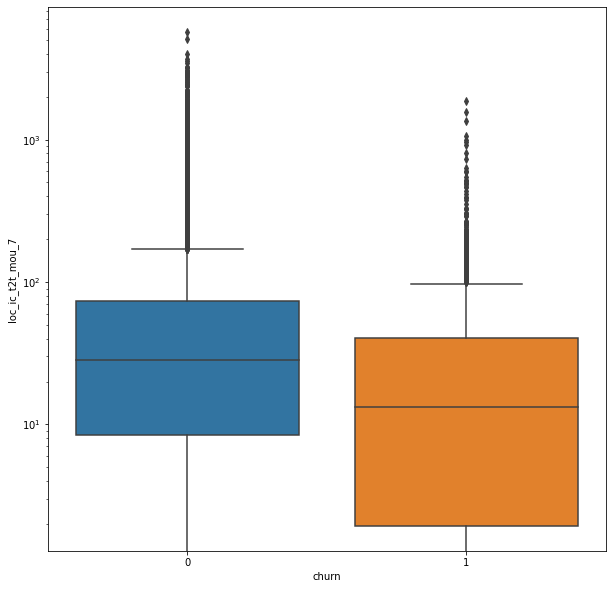

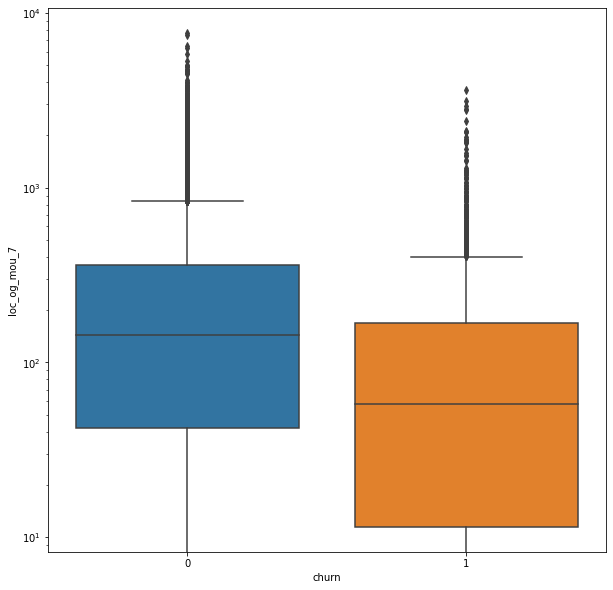

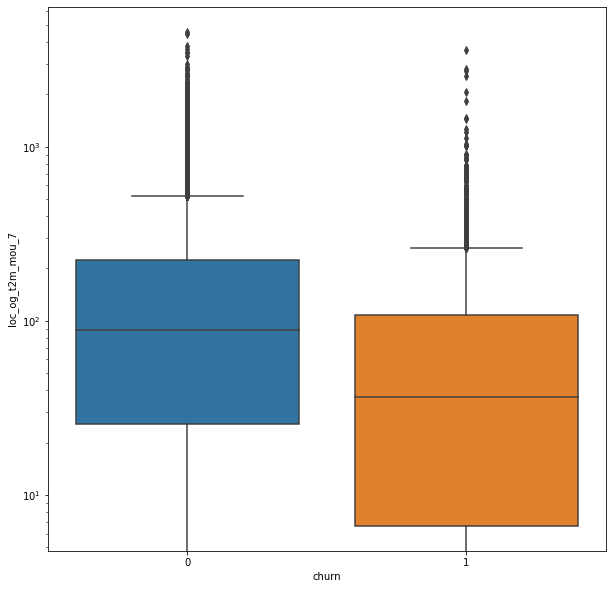

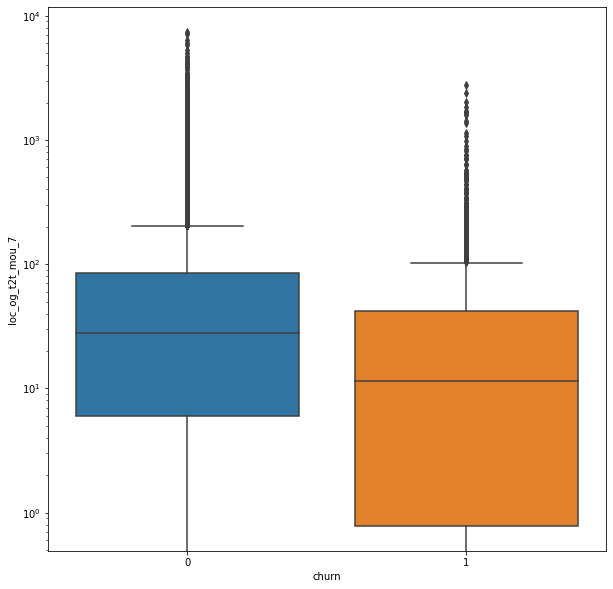

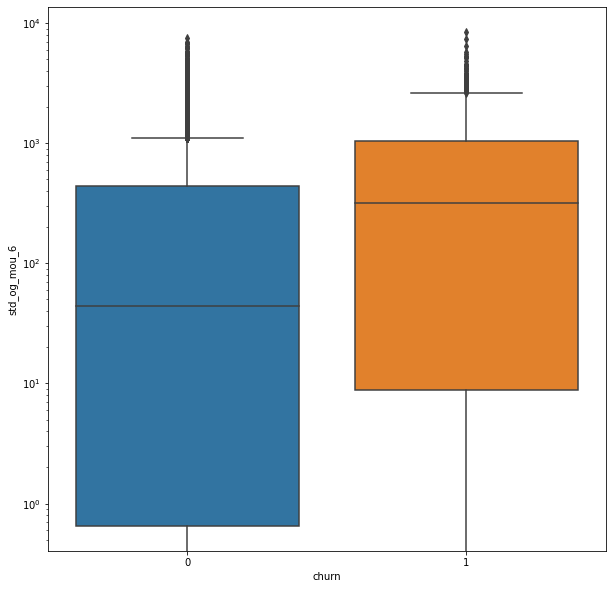

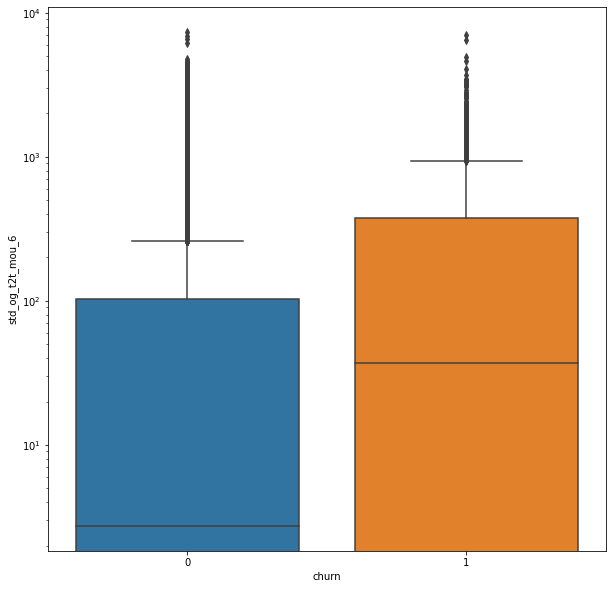

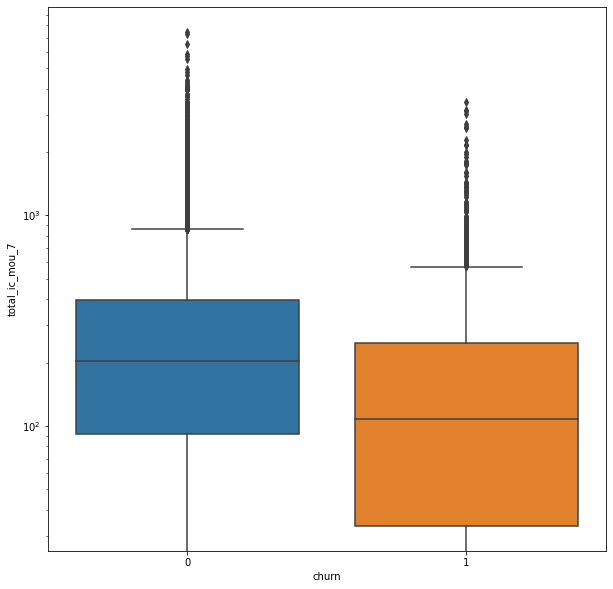

In [1178]:
#plotting the significantly deviating variables using boxplot

for i in sorted(significantly_deviating):
    if i!='churn':
        plt.figure(figsize=(10,10))
        sns.boxplot(data=churn_data,x='churn',y=i)
        plt.yscale('log')
        plt.show()

### Observations :

* From the above plots we can see that there are 2 categories of variables based on how much they vary with the target variable :

1. Less Deviation
2. Moderate Deviation
3. Siginificant Deviation

In [1179]:
#preparing a dataframe to show the 3 categories with different deviations

univariate1 = pd.DataFrame({'Less Deviation':less_deviating})
univariate2 = pd.DataFrame({'Moderate Deviation':moderately_deviating})
univariate3 = pd.DataFrame({'Significant Deviation':significantly_deviating})

univariate = pd.concat([univariate1,univariate2,univariate3],ignore_index=True,axis=1)
univariate = univariate.rename(columns={0:'Less Deviation',1:'Moderate Deviation',2:'Significant Deviation'})
univariate.fillna(' ',inplace=True)

univariate


,Less Deviation,Moderate Deviation,Significant Deviation
0,arpu_7,days_since_last_rech_calls,loc_ic_t2f_mou_6
1,ic_others_6,total_rech_amt_6,loc_ic_mou_7
2,ic_others_7,std_ic_t2t_mou_6,loc_og_t2t_mou_7
3,isd_ic_mou_6,std_og_t2t_mou_7,total_ic_mou_7
4,isd_ic_mou_7,offnet_mou_6,std_og_mou_6
5,isd_og_mou_6,std_og_t2m_mou_6,loc_og_t2m_mou_7
6,isd_og_mou_7,std_ic_mou_6,loc_ic_t2f_mou_7
7,jul_vbc_3g,loc_ic_t2t_mou_6,std_og_t2t_mou_6
8,jun_vbc_3g,total_og_mou_6,loc_ic_t2t_mou_7
9,last_day_rch_amt_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7




### b. Bi-Variate Analysis

In [1180]:
#filtering the columns which are realted to incoming, outgoing for the month of June

june = sorted([i for i in list(churn_data.columns) if (('_6' in i) and (('og' in i) or ('ic' in i)))])

In [1181]:
#printing the june columns whih have 'og' or 'ic'
june

['ic_others_6',
 'isd_ic_mou_6',
 'isd_og_mou_6',
 'loc_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_og_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'og_others_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'spl_ic_mou_6',
 'spl_og_mou_6',
 'std_ic_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2t_mou_6',
 'std_og_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2t_mou_6',
 'total_ic_mou_6',
 'total_og_mou_6']

In [1182]:
#filtering the columns which are realted to incoming, outgoing for the month of July

july = sorted([i for i in list(churn_data.columns) if (('_7' in i) and (('og' in i) or ('ic' in i)))])

In [1183]:
#printing the july columns whih have 'og' or 'ic'
july

['ic_others_7',
 'isd_ic_mou_7',
 'isd_og_mou_7',
 'loc_ic_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_og_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2t_mou_7',
 'og_others_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'spl_ic_mou_7',
 'spl_og_mou_7',
 'std_ic_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2t_mou_7',
 'std_og_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2t_mou_7',
 'total_ic_mou_7',
 'total_og_mou_7']

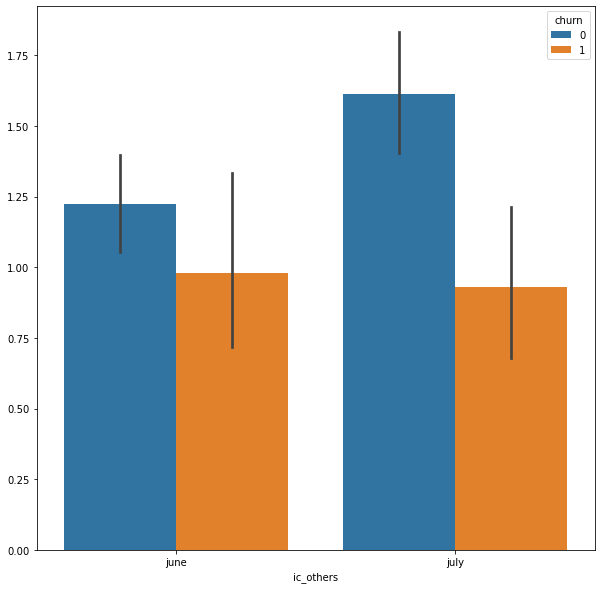

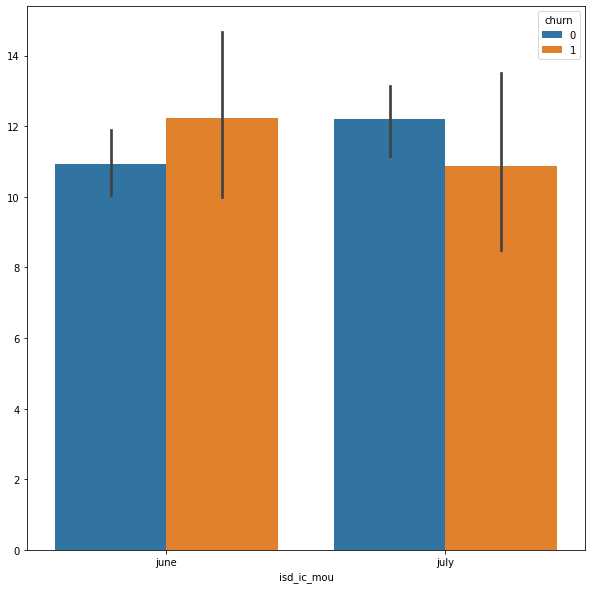

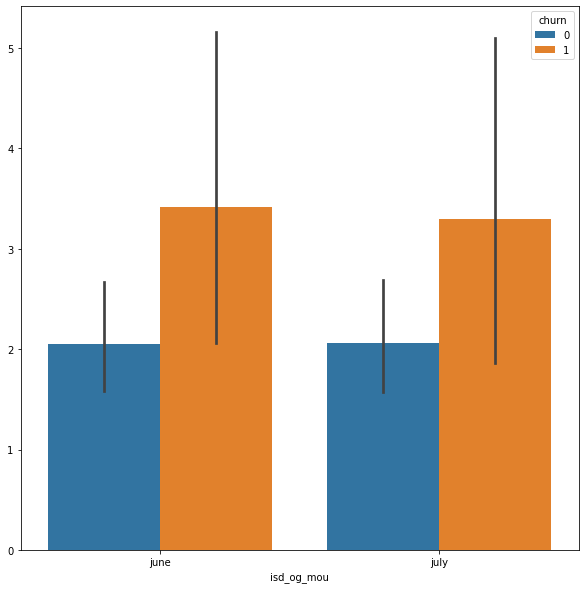

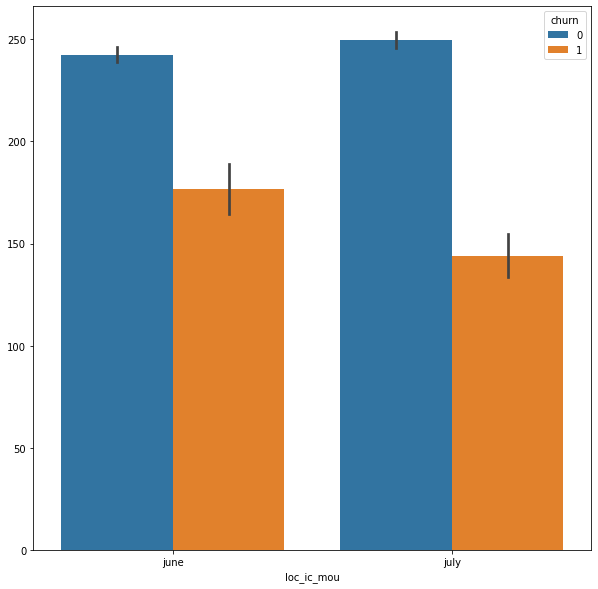

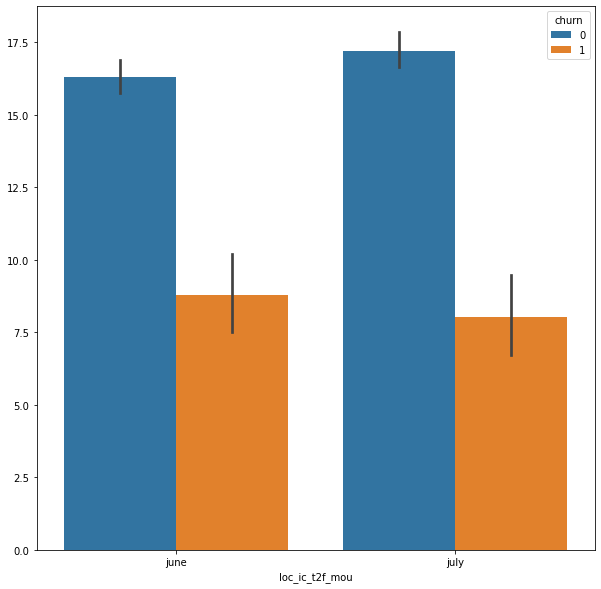

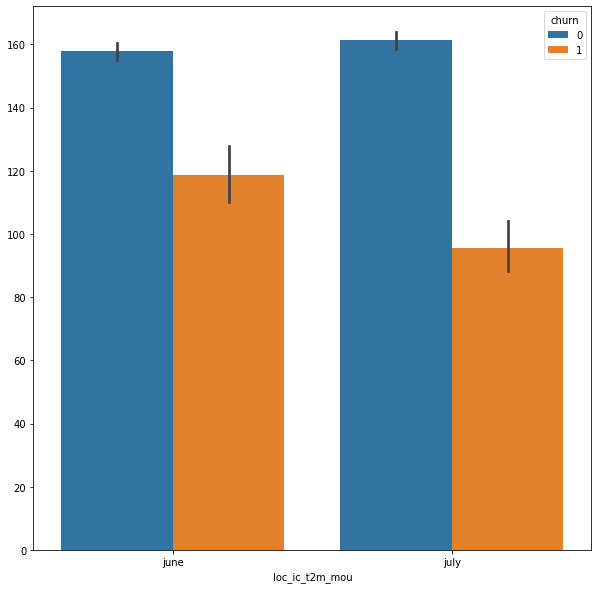

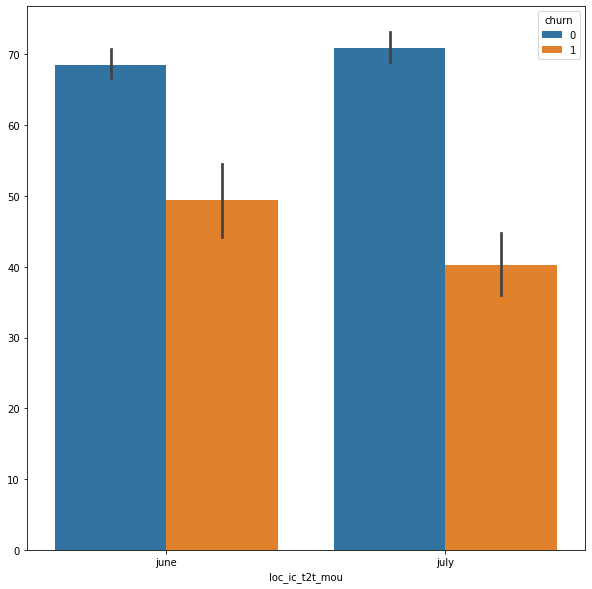

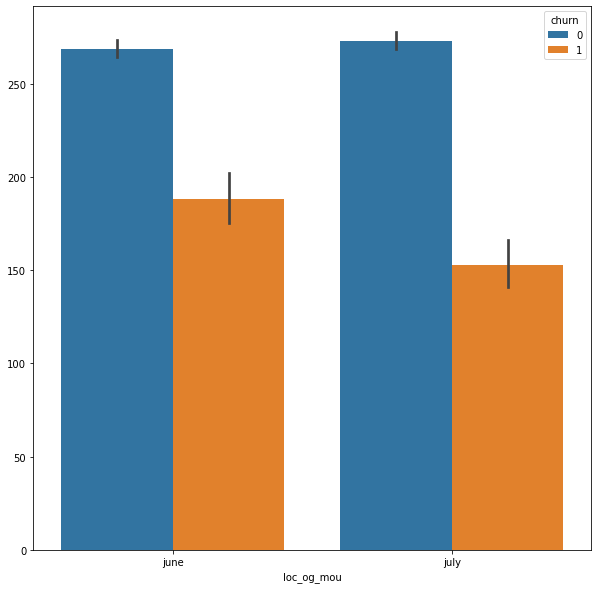

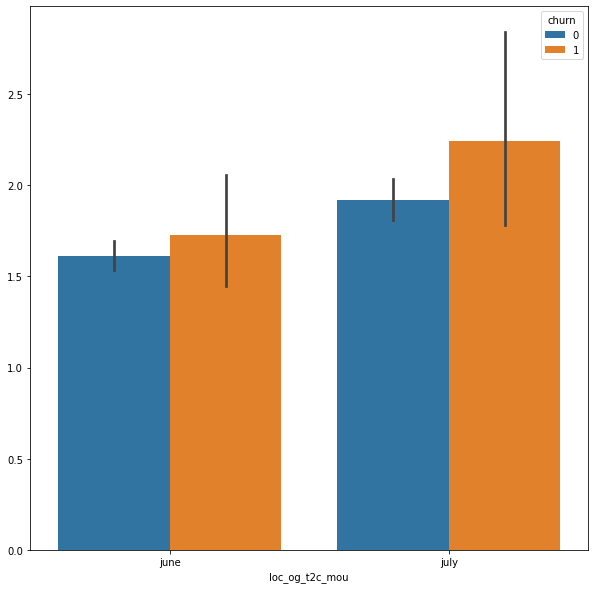

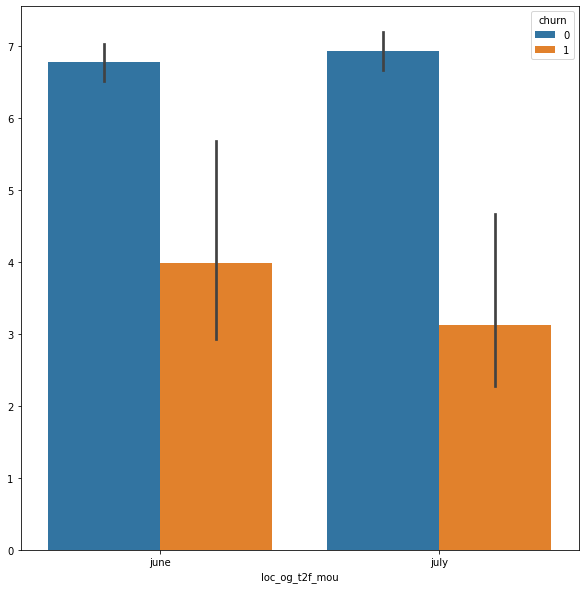

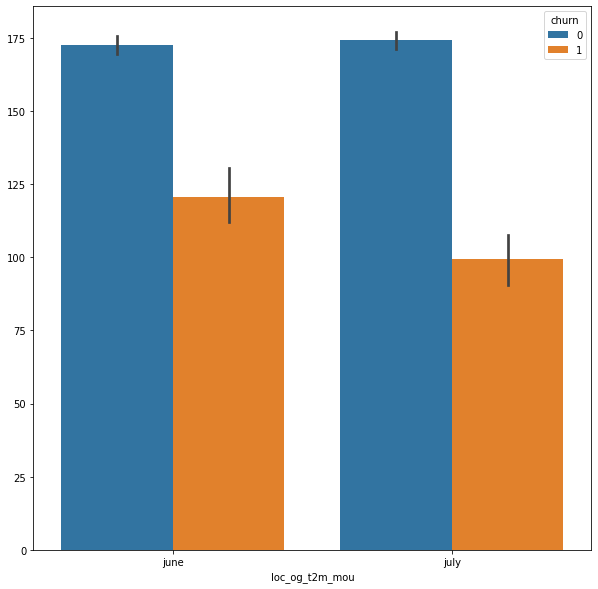

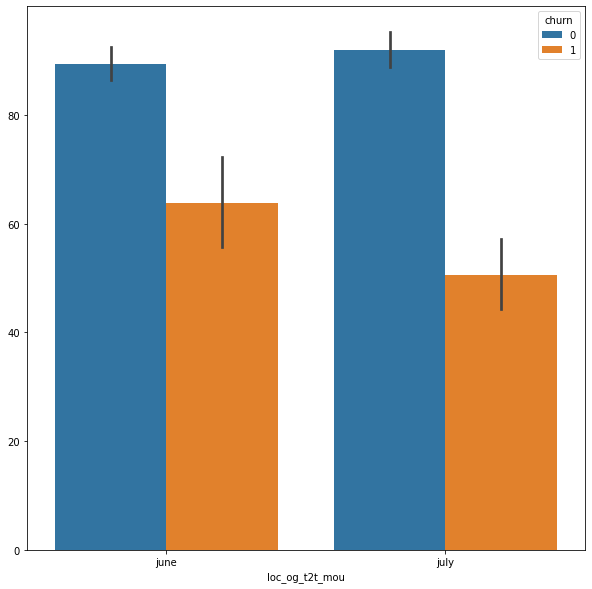

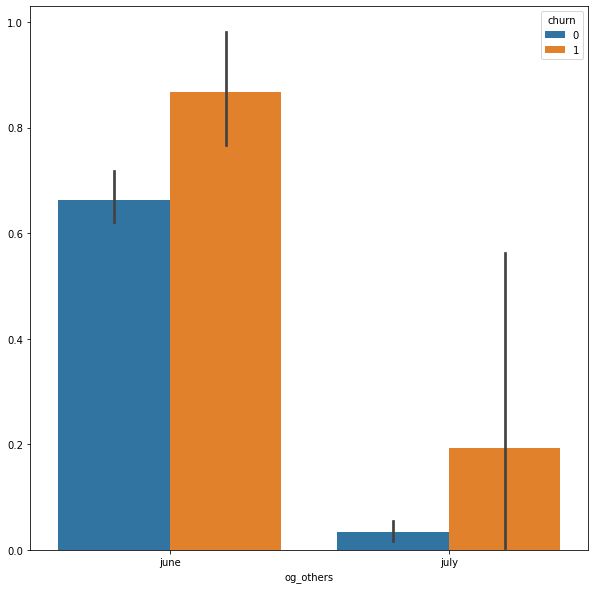

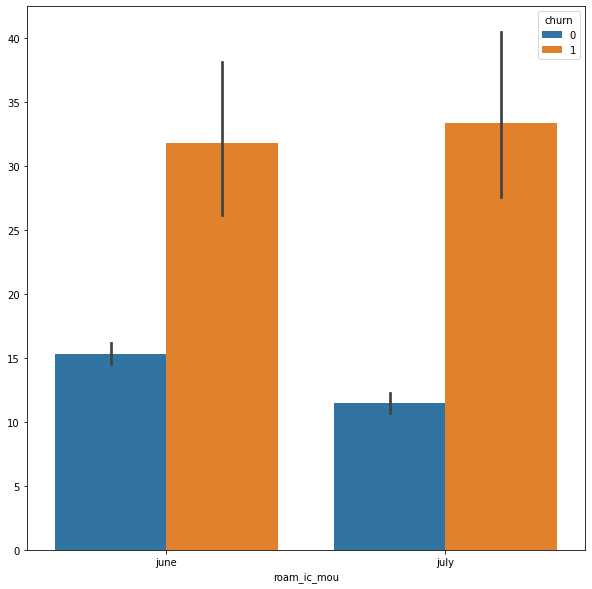

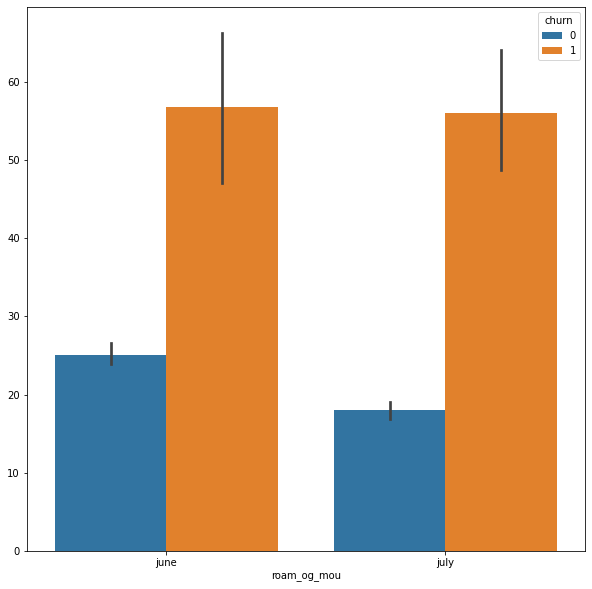

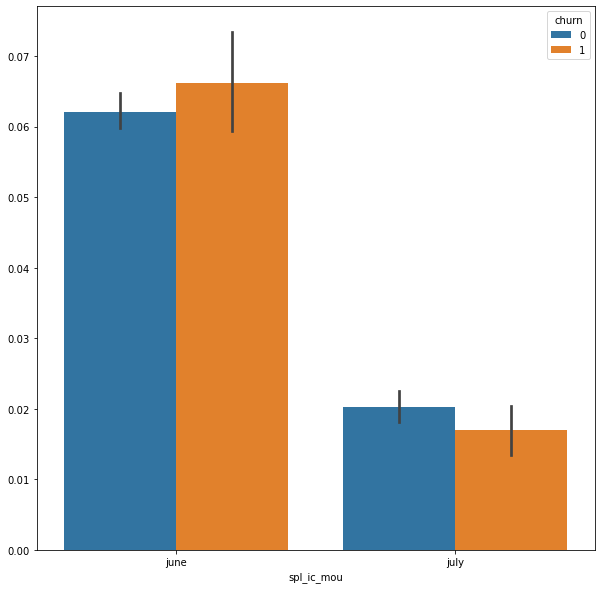

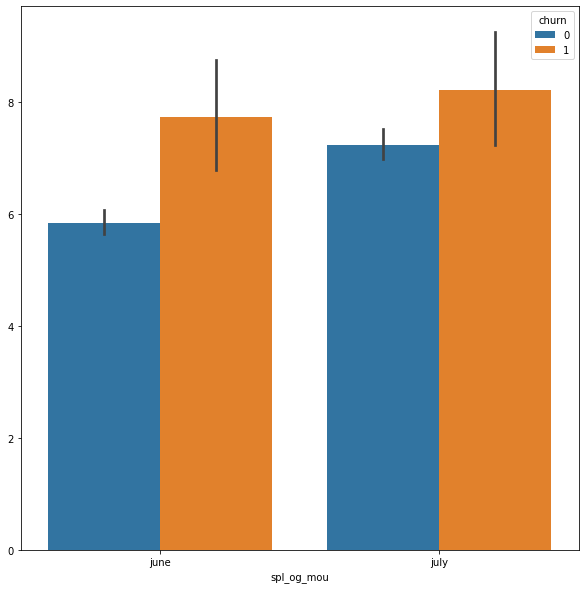

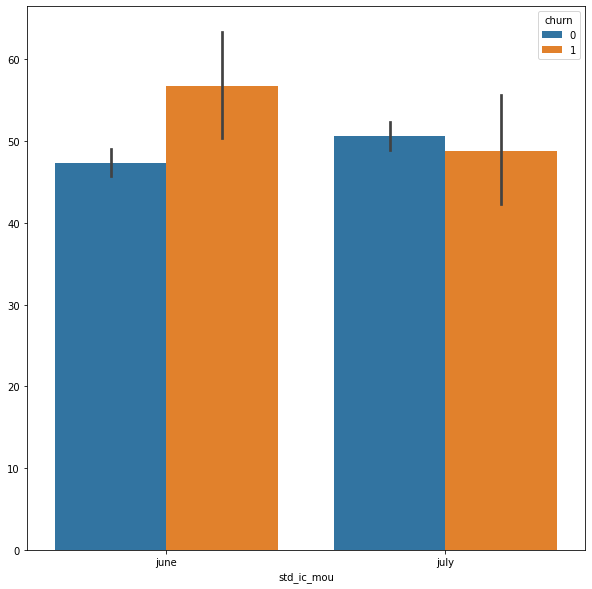

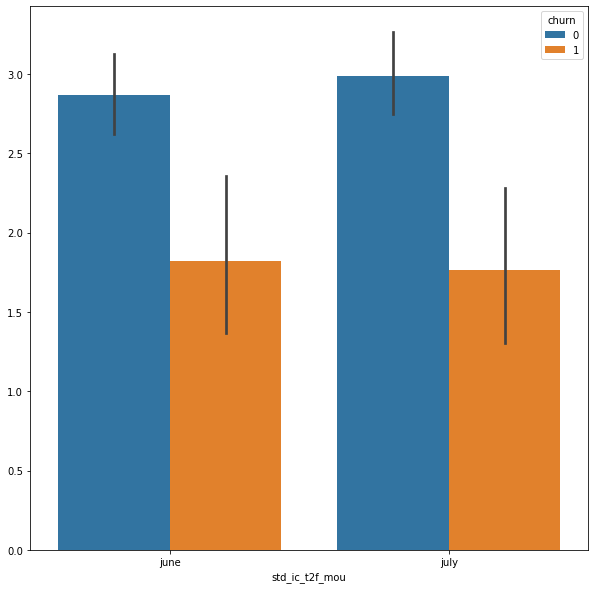

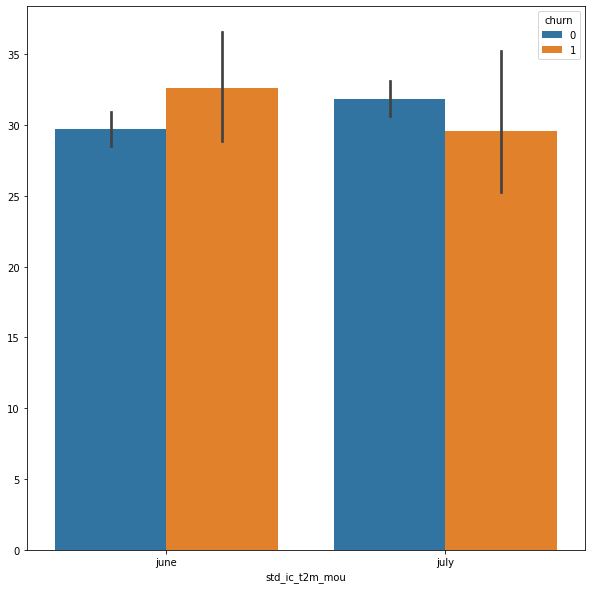

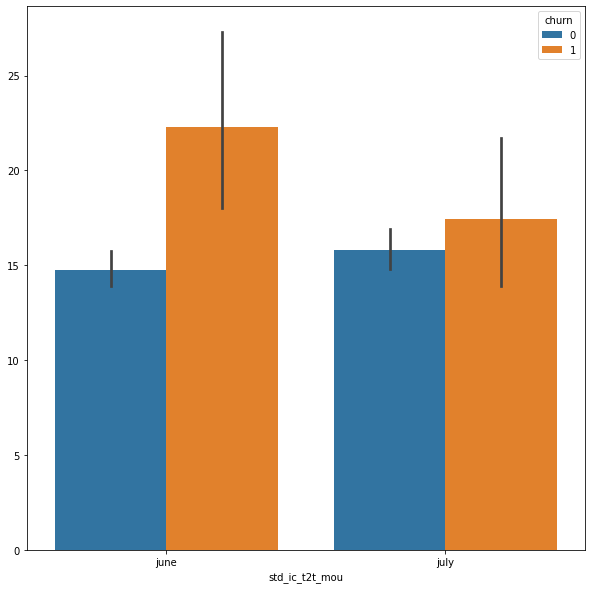

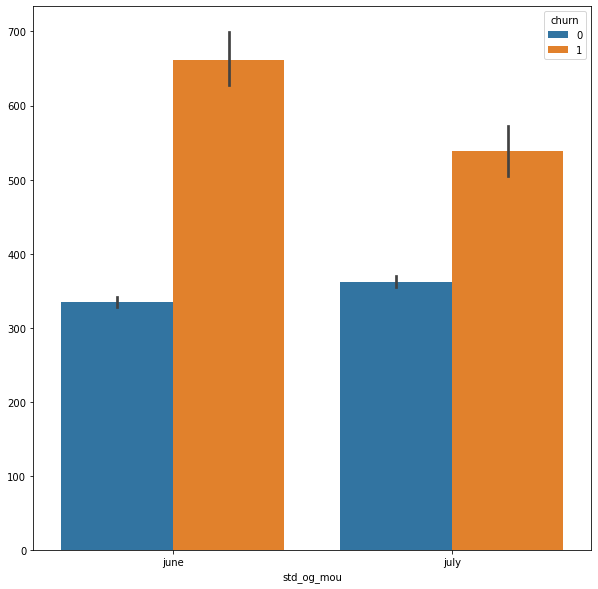

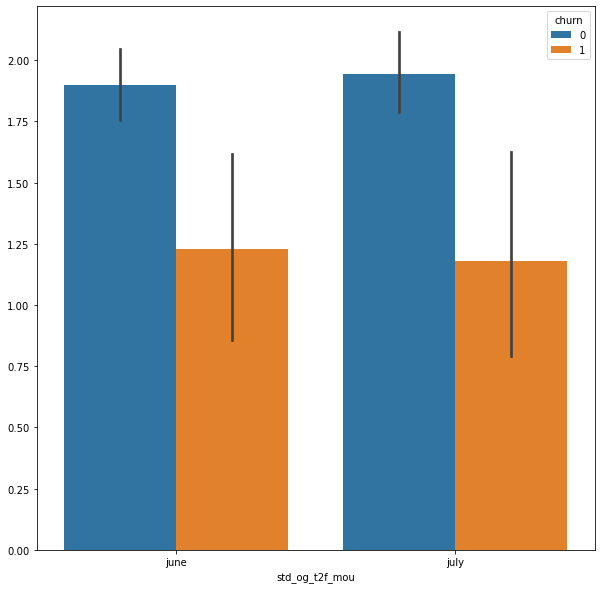

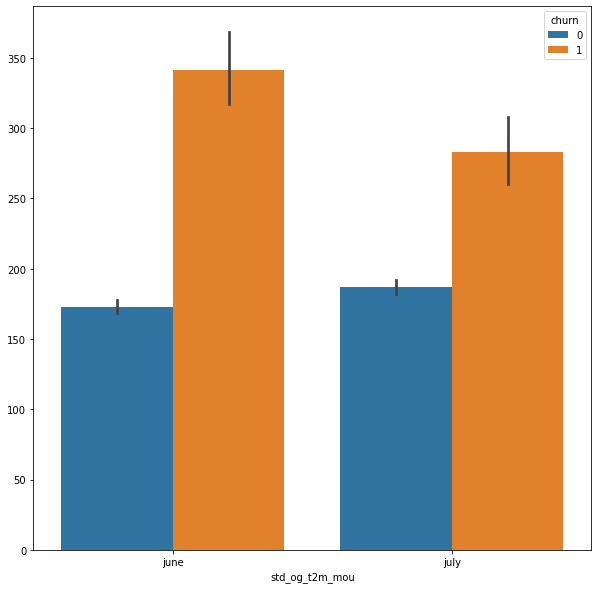

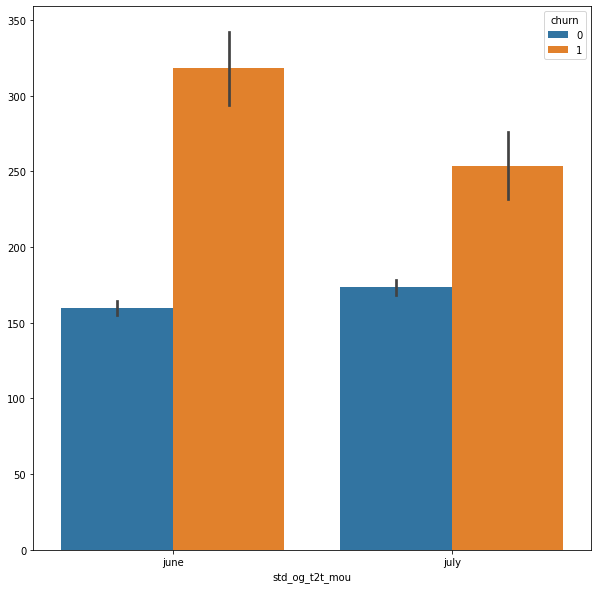

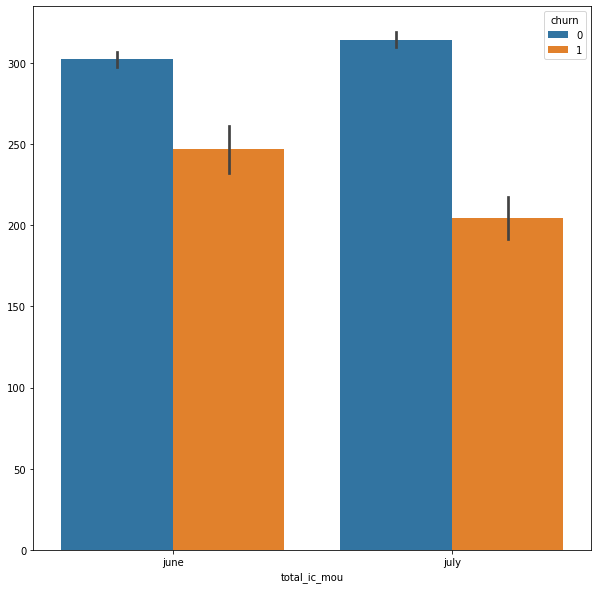

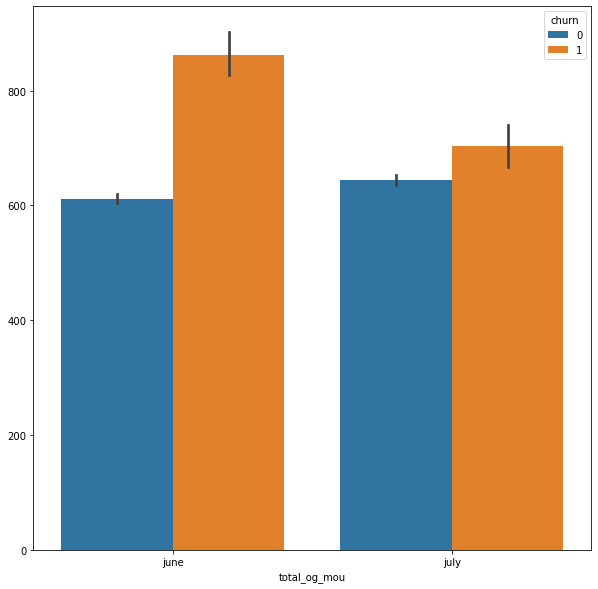

In [1184]:
# Concatenating the June and July columns vertically to visualize the changes in behaviour of customers from
# june to july

a = pd.Series(['june']*len(churn_data.index)+['july']*len(churn_data.index))
c = pd.concat([churn_data['churn'],churn_data['churn']],axis=0,ignore_index=True)


# Visualizing the change in behaviour of customer from June to July

for i in range(0,len(june)):
    
    b = pd.concat([churn_data[june[i]],churn_data[july[i]]],axis=0,ignore_index=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x=a,
            y=b,hue=c)
    plt.xlabel(june[i][:-2])

    

## Observations :

**From above plots we can see the following trend :**

**1. Among the customer's who have churned, there is a considerable decline in the incoming and outgoing services in terms of the average duration.**


**2. Also, among those who have churned, the average call duration with the customer call center has increased from June to July. Hence these calls might include complaints related to charges or service.**


**3. The churned customers are among those who often bear roaming charges. This might be due to the roaming charges being higher.**



# <font color='Blue'>Data Modelling</font>

### a. Feature Scaling

In [1185]:
#creating a scaler object

scaler = StandardScaler()

In [1186]:
#storing the dataset in 'df'
df = churn_data

In [1187]:
# perform test train split and extract test and train data
churn_train, churn_test = train_test_split(churn_data, random_state=100, train_size=0.7)
print(churn_train.shape, churn_test.shape)

(19751, 89) (8466, 89)


In [1188]:
#splitting train data into X and y

x_train = churn_train.drop(columns=['churn'])
y_train = churn_train['churn']

print(x_train.shape)
print(y_train.shape)

(19751, 88)
(19751,)


In [1189]:
# fit the standard scaler on the train data 
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[ 0.91571954, -0.76039203, -0.0871911 , ..., -0.31981535,
        -0.35522463, -0.36913849],
       [-0.31483338, -0.30435266, -0.51237344, ..., -0.31981535,
        -0.35522463, -0.46949604],
       [ 0.16946356, -0.3151489 , -0.55849499, ..., -0.31981535,
        -0.35522463, -0.38240003],
       ...,
       [ 1.52609705,  0.52524934, -0.51842217, ..., -0.31981535,
        -0.35522463,  0.02046384],
       [-0.12876843, -0.03372849, -0.2742264 , ..., -0.14561646,
        -0.18927164, -0.26555517],
       [ 0.64328444,  0.53244214, -0.14588536, ..., -0.18294479,
         1.77318839,  1.08138648]])

In [1190]:
# since standard scaler returns a numpy array, 
# lets convert the scaled data to datarframe and assign index and column names
x_train_scaled = pd.DataFrame(x_train_scaled, 
                             index=x_train.index, columns=x_train.columns)

x_train_scaled.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
25436,0.915720,-0.760392,-0.087191,-0.360935,2.510303,-0.296941,-0.219230,-0.166065,-0.232662,-0.215514,0.608718,0.045106,5.768674,0.281288,-0.280448,-0.242301,2.414706,-0.155360,4.175211,0.195516,-0.418129,-0.417671,-0.442653,-0.433303,0.011941,-0.144212,-0.575612,-0.570888,-0.058897,-0.052768,0.639301,-0.014468,2.320627,-0.016261,1.771745,-0.413995,1.994040,0.037335,0.261940,-0.226132,-0.318104,-0.000309,1.198209,-0.135285,-0.182166,-0.173157,-0.286613,-0.291996,-0.133808,-0.138019,-0.327175,-0.322228,0.856137,-0.283088,1.182566,-0.09917,-0.138837,-0.144132,-0.076942,-0.088589,0.636668,-0.727495,0.795925,-0.813044,-0.337828,-0.344749,0.063687,0.068302,-0.385748,-0.383759,-0.389900,-0.409595,-0.401220,-0.410113,-0.434217,-0.453676,-0.343738,-0.339675,-0.213475,-0.216298,-0.954511,-0.408116,-0.392432,0.901369,1.231299,-0.319815,-0.355225,-0.369138
81298,-0.314833,-0.304353,-0.512373,-0.529956,-0.606322,-0.704805,-0.219230,-0.166065,-0.232662,-0.215514,-0.243839,-0.291655,-0.328572,-0.562508,-0.184104,-0.283892,-0.263555,-0.217868,-0.378088,-0.567439,-0.418129,-0.417671,-0.442653,-0.432300,-0.157142,-0.144212,-0.578756,-0.570202,-0.058897,-0.052768,-0.109197,0.025651,-0.000508,-0.016261,-0.724912,-0.809972,-0.057591,0.052516,1.273969,0.327509,-0.321005,-0.237374,0.802811,0.216740,-0.182166,-0.173157,-0.274008,-0.291996,1.392727,0.962429,-0.090255,-0.171685,0.613864,0.074355,-0.308006,-0.09917,-0.138837,-0.140836,-0.048373,-0.088589,-0.647974,0.008927,-0.760362,0.220818,-0.337828,0.714641,-0.543347,1.424008,-0.385748,-0.383759,-0.389900,-0.409595,-0.401220,-0.410113,-0.434217,-0.453676,-0.343738,-0.339675,-0.213475,-0.216298,-0.221878,-0.274254,-0.392432,-0.778154,1.231299,-0.319815,-0.355225,-0.469496
97788,0.169464,-0.315149,-0.558495,-0.510033,1.805019,0.888361,-0.178203,-0.166065,0.009990,-0.215514,-0.341345,-0.325766,-0.495502,-0.553274,-0.166092,-0.197314,-0.263555,-0.217868,-0.547040,-0.577945,-0.415282,-0.375534,2.389543,1.373092,-0.157142,-0.144212,1.358786,0.691926,-0.014722,-0.052768,-0.330913,-0.327305,-0.141939,-0.016261,0.903715,0.307454,-0.313814,-0.355930,-0.584845,-0.521480,-0.215015,-0.312174,-0.601457,-0.600968,-0.182166,-0.173157,0.380598,0.530009,-0.133808,-0.138019,0.140906,0.246011,-0.489696,-0.436855,-0.308006,-0.09917,-0.138837,-0.144132,-0.076942,-0.088589,-0.005653,-0.306682,0.176516,-0.277829,-0.337828,-0.288992,-0.703827,-0.573874,-0.385748,-0.383759,-0.389900,-0.409595,-0.401220,-0.410113,-0.434217,-0.453676,-0.343738,-0.339675,-0.213475,-0.216298,-0.591325,-0.408116,-0.392432,-0.778154,1.231299,-0.319815,-0.355225,-0.382400
92194,-0.209405,-0.242722,-0.116419,0.098352,-0.287491,0.214821,-0.219230,-0.166065,-0.232662,-0.215514,0.550111

In [1191]:
#checking the mean and SD after applying the standard scaler

x_train_scaled.describe()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
count,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04,1.975100e+04
mean,8.487296e-17,5.575005e-17,-6.078655e-17,-1.074164e-16,4.945512e-18,-1.158227e-17,1.375280e-15,8.887518e-17,3.162092e-16,3.620184e-16,-2.740285e-20,4.337503e-17,3.362962e-17,4.796412e-17,-6.412886e-16,-6.287085e-16,1.163567e-15,-2.141666e-16,2.121964e-17,-4.894922e-18,4.211467e-16,-4.360117e-16,3.232974e-17,3.331540e-16,-5.607326e-17,-4.430128e-16,1.979751e-16,6.799786e-16,7.018615e-16,-3.203316e-16,-2.187225e-16,2.272666e-16,-4.487688e-16,3.823727e-16,5.657916e-17,-5.902153e-20,-4.014588e-17,-5.117166e-17,1.077846e-16,1.613255e-16,-1.253505e-18,-3.382777e-17,-6.699786e-17,2.186607e-17,-6.960198e-16,-1.484204e-15,3.908209e-17,2.170910e-16,2.968561e-15,-8.647019e-16,4.433641e-17,3.258550e-17,4.144435e-17,-2.195601e-17,6.912376e-16,1.443810e-15,1.805883e-15,-1.125220e-15,-5.339846e-16,1.921117e-15,-3.153436e-18,-6.539248e-16,-7.786907e-17,6.257968e-17,3.689689e-17,-7.544919e-17,4.058657e-16,3.236741e-16,1.892062e-16,1.180206e-15,-8.277448e-16,-4.525883e-16,5.956115e-17,-9.668850e-16,1.130082e-15,2.444419e-16,-1.119756e-15,4.458936e-16,-3.474937e-15,8.790947e-16,-1.251032e-16,2.374127e-16,-4.343984e-17,2.484244e-17,5.869157e-16,3.615111e-16,-9.241085e-17,1.432256e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.0000

In [1192]:
# diving test data into X and y

x_test = churn_test.drop(columns=['churn'])
y_test = churn_test['churn']

print(x_test.shape)
print(y_test.shape)

(8466, 88)
(8466,)


In [1193]:
# with the same scaler, let's transform the test data as well 
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.43762576,  0.64588309,  2.56316689, ..., -0.31981535,
        -0.35522463, -0.12756354],
       [-0.06473007, -0.27973419, -0.2983997 , ..., -0.16428063,
        -0.20705232, -0.25766993],
       [ 0.18365557, -0.69671315,  1.64527248, ..., -0.28594334,
        -0.322956  , -0.45372557],
       ...,
       [-0.29772049,  0.00417302, -0.5777429 , ...,  0.24149218,
         0.1795128 ,  0.15702179],
       [-0.22318482, -0.16156108, -0.10041189, ..., -0.13040862,
        -0.35522463, -0.33007074],
       [-0.23810173, -0.23991728, -0.46322753, ..., -0.31981535,
        -0.23734532, -0.44584033]])

In [1194]:
# since standard scaler returns a numpy array, 
# lets convert the scaled data to datarframe and assign index and column names
x_test_scaled = pd.DataFrame(x_test_scaled, 
                             index=x_test.index, columns=x_test.columns)

x_test_scaled.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
46368,0.437626,0.645883,2.563167,1.281747,-0.089625,-0.337166,-0.219230,0.476549,-0.232662,3.301520,-0.366252,-0.348754,-0.543789,-0.668994,-0.280448,-0.283892,-0.263555,-0.217868,-0.601472,-0.672766,3.144863,1.126342,0.289774,-0.188254,-0.157142,-0.144212,2.250679,0.601278,-0.058897,-0.052768,-0.317021,-0.327305,-0.141939,-0.016261,1.666296,0.176594,-0.390681,-0.380808,-0.396548,-0.704658,-0.283518,-0.330874,-0.522225,-0.743441,-0.122015,-0.170997,-0.282118,-0.291996,-0.133808,-0.138019,-0.288923,-0.320962,-0.590350,-0.790965,1.927851,-0.09917,-0.138837,-0.144132,-0.076942,-0.088589,-0.005653,0.534943,0.540570,0.553249,-0.337828,-0.344749,0.063687,0.068302,-0.385748,-0.383759,-0.389900,-0.409595,-0.40122,-0.410113,-0.434217,-0.453676,-0.343738,-0.339675,-0.213475,-0.216298,-0.666467,-0.408116,-0.392432,-0.148333,1.231299,-0.319815,-0.355225,-0.127564
57454,-0.064730,-0.279734,-0.298400,-0.405003,0.077779,-0.164171,-0.219230,-0.166065,-0.232662,-0.215514,0.094420,-0.158658,0.114873,-0.186186,-0.244424,-0.180763,-0.263555,-0.217868,0.118300,-0.232938,-0.366694,-0.351489,0.072316,-0.028552,0.490721,-0.119841,-0.181120,-0.250515,-0.058897,-0.052768,-0.194216,-0.181255,-0.098262,-0.016261,-0.105837,-0.354694,-0.215317,-0.145069,0.047506,-0.112821,-0.330377,-0.287442,-0.128985,-0.201358,-0.182166,-0.173157,-0.028836,0.069555,-0.036047,-0.095908,-0.131730,-0.066533,-0.195503,-0.232313,-0.308006,-0.09917,-0.138837,-0.144132,-0.076942,-0.088589,-0.112707,0.008927,-0.101269,-0.179762,-0.280572,-0.288992,-0.494505,-0.538198,-0.371170,-0.379636,-0.003974,0.018415,-0.40122,-0.410113,0.750453,0.634695,-0.343738,-0.339675,-0.213475,-0.216298,0.272806,-0.375509,-0.208955,0.481488,-0.967000,-0.164281,-0.207052,-0.257670
88537,0.183656,-0.696713,1.645272,-0.470024,-0.450941,-0.714552,-0.104192,0.357447,-0.062985,0.527114,-0.074255,-0.361602,-0.377857,-0.683881,-0.105353,-0.283892,-0.263555,-0.217868,-0.302243,-0.690601,1.892734,-0.417671,-0.284147,-0.433303,-0.157142,-0.144212,1.040016,-0.570888,-0.058897,-0.052768,0.710428,-0.327305,0.303153,-0.016261,0.779880,-0.885544,0.267752,-0.392295,-0.184967,-0.704658,0.745592,-0.330874,0.121160,-0.749688,-0.068221,-0.173157,-0.016524,-0.291996,-0.133808,-0.138019,-0.071266,-0.322228,0.040833,-0.796712,-0.308006,-0.09917,-0.138837,-0.144132,-0.076942,-0.088589,-0.112707,-0.832699,0.176516,-0.771490,-0.337828,-0.344749,0.063687,-0.359816,-0.054523,-0.029656,-0.389900,-0.409595,-0.40122,-0.410113,-0.434217,-0.453676,-0.343738,-0.339675,0.770504,0.697717,-0.796922,-0.408116,-0.392432,-0.148333,-0.047712,-0.285943,-0.322956,-0.453726
69571,-0.259743,-0.243358,-0.242665,-0.381619,0.345973,0.289613,-0.219230,-0.166065,-0.232662,-0.215514,0.1031

In [1195]:
#checking the mean and SD after applying Standard Scaler on test data
x_test_scaled.describe()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,days_since_last_rech_calls,days_since_last_rech_data,data_rech_amt_6,data_rech_amt_7,total_rech_amt
count,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000
mean,0.005442,0.014117,0.014820,0.014938,-0.019679,0.000056,0.009500,0.002978,0.008079,0.002184,0.005354,0.011014,0.006053,0.004929,-0.016197,-0.005433,0.014965,0.009400,0.006255,0.009894,0.011301,0.009029,-0.026950,-0.002936,0.008021,0.013553,-0.010883,0.004130,0.013347,0.018274,0.005946,0.007097,-0.003661,-0.002008,-0.005530,0.010002,0.012577,0.013405,0.030092,0.029601,0.012462,0.005302,0.029244,0.028478,-0.007006,-0.003076,-0.005299,-0.006206,-0.019040,-0.013621,-0.010642,-0.007955,0.017839,0.018774,0.006160,-0.006074,-0.011415,-0.005849,-0.007248,-0.008982,0.016147,0.015538,0.007352,0.010654,0.005585,0.005908,-0.006900,0.004231,0.006714,0.004387,0.001899,-0.002547,0.022335,0.001427,0.003679,0.008746,0.012548,-0.003197,-0.014727,-0.014515,0.023504,0.004372,0.022737,-0.012985,0.004013,0.000639,-0.000688,0.003782
std,0.916834,0.912022,1.033428,1.002154,0.956751,0.972712,1.118720,0.969427,1.051624,1.063161,1.035095,1.036411,1.045242,1.000630,0.817100,0.829179,1.192890,1.199493,1.052257,1.014996,1.033156,0.990833,0.921897,0.950573,1.148012,1.143674,0.974105,0.962853,1.959230,1.733549,0.981607,1.012328,0.459907,0.843420,0.992108,0.974879,0.923287,0.927570,1.057117,1.035305,1.084286,0.979876,1.016616,1.011103,0.752237,0.707216,0.897645,0.900955,0.597816,0.712613,0.845413,0.826908,0.974518,0.970097,0.828371,0.641593,0.856394,0.845699,0.579828,0.632913,1.043355,1.000419,0.894726,0.918771,0.987710,0.987826,0.966823,0.979963,1.011586,1.028621,0.991792,0.983133,1.021545,1.000534,1.024687,1.028808,0.996889,0.976330,0.921033,0.978138,1.010787,1.022603,1.126363,1.005514,1.000051,0.982475,0.946275,0.949708
min,-2.933777,-2.954740,-0.

### OBSERVATIONS : 
**Now our data preparation for modeling is done. All the variables have been standardised and are made ready for the modeling**

## b. Building Multiple Models

### Simple Logistic Regression

In [1196]:
#creating a logistic regression object by taking into consideration the class imbalance

lr = LogisticRegression(class_weight='balanced')

In [1197]:
#fitting the model on train data

lr_model = lr.fit(x_train_scaled, y_train)

In [1198]:
# make predictions on train set 
pred_probs_train = lr_model.predict_proba(x_train_scaled)
pred_train = pd.DataFrame(pred_probs_train)
pred_train = pred_train.iloc[:,[1]]
pred_train.reset_index(drop=True, inplace=True)



# make predictions on test set 
pred_probs_test = lr_model.predict_proba(x_test_scaled)
pred_test = pd.DataFrame(pred_probs_test)
pred_test = pred_test.iloc[:,[1]]
pred_test.reset_index(drop=True, inplace=True)

In [1199]:
# converting y_train to DF 
y_train_df = pd.DataFrame(y_train)
y_train_df.reset_index(drop=True, inplace=True)
y_train_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [1200]:
# converting y_test to DF 
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,churn
0,1
1,0
2,0
3,0
4,0


In [1201]:
# appending y_test_df and pred_probs_test

pred_test_final = pd.concat([y_test_df, pred_test], axis=1)
pred_test_final = pred_test_final.rename(columns={1:'Probability'})
pred_test_final = pred_test_final.reindex(['churn', 'Probability'], axis=1)

pred_test_final.head()

,churn,Probability
0,1,0.858684
1,0,0.424835
2,0,0.776146
3,0,0.330852
4,0,0.465051


In [1202]:
# appending y_train_df and pred_probs_train

pred_train_final = pd.concat([y_train_df, pred_train], axis=1)
pred_train_final = pred_train_final.rename(columns={1:'Probability'})
pred_train_final = pred_train_final.reindex(['churn', 'Probability'], axis=1)

pred_train_final.head()

,churn,Probability
0,0,0.448181
1,0,0.403393
2,0,0.622459
3,0,0.039625
4,0,0.495771


In [1203]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0

pred_train_final['predicted'] = pred_train_final.Probability.map( lambda x: 1 if x > 0.5 else 0)

pred_test_final['predicted'] = pred_test_final.Probability.map( lambda x: 1 if x > 0.5 else 0)


In [1204]:
# Confusion matrix 
confusion = metrics.confusion_matrix( pred_test_final.churn, pred_test_final.predicted )
confusion

array([[5481, 2351],
       [ 217,  417]])

In [1205]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

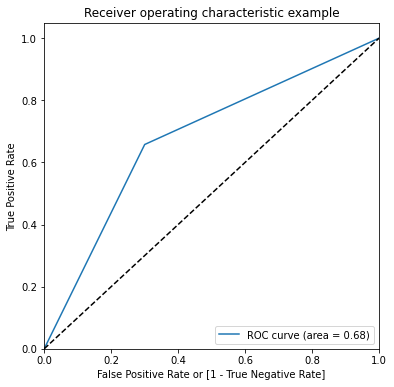

(array([0.        , 0.30017875, 1.        ]),
 array([0.        , 0.65772871, 1.        ]),
 array([2, 1, 0]))

In [1206]:
draw_roc(pred_test_final.churn, pred_test_final.predicted)

In [1207]:
# roc auc score of test set
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.74'

In [1208]:
#printing the recall score for test data

recall_score = metrics.recall_score(pred_test_final.churn, pred_test_final.predicted)
recall_score

0.6577287066246057

In [1209]:
accuracy_score = metrics.accuracy_score(pred_train_final.churn, pred_train_final.predicted)
accuracy_score

0.6967748468431978

In [1210]:
#printing the accuracy score for test data

accuracy_score = metrics.accuracy_score(pred_test_final.churn, pred_test_final.predicted)
accuracy_score

0.6966690290574061

### Observations :

* The model's train and test accuracy is 69%
* The test recall of the model is 71% which is good as we predict the potential churn customers correctly 7/10 times.
* The roc_auc score of the model is 77%.

### PCA with Logistic regression 

* Since the earlier model considered all the variables we'll now use PCA to reduce the dimensions as there might be variables which do not explain much about the target variable. 


* We'll also try to make sure our model explains the variance in the target variable by a good percentage.

In [1211]:
# instantiate the PCA object
pca  = PCA(random_state=42)

In [1212]:
# fit the x_train data to PCA object
pca.fit(x_train_scaled)

PCA(random_state=42)

In [1213]:
# check the components from PCA
pca.components_

array([[ 2.13978476e-01,  2.07405516e-01,  1.60423438e-01, ...,
        -6.40890722e-02, -6.93674152e-02,  1.67648995e-02],
       [ 1.61704258e-03, -4.92692633e-03, -1.29351123e-01, ...,
         5.22473515e-02,  5.22615906e-02,  5.47863427e-02],
       [ 1.97670020e-01,  2.15272604e-01, -1.94698618e-02, ...,
         2.27480181e-01,  2.39824617e-01,  3.34599764e-01],
       ...,
       [-1.28387136e-07, -1.29834518e-08,  3.79430477e-06, ...,
         1.09935831e-08, -1.10995198e-07, -1.12334628e-08],
       [ 3.21421238e-07, -9.40501980e-08,  2.48026830e-07, ...,
         4.36260677e-08, -2.76893559e-08,  5.32215161e-09],
       [-0.00000000e+00, -1.15458326e-16, -1.79448284e-14, ...,
         4.03074976e-01,  4.23103015e-01, -7.77389501e-01]])

In [1214]:
# check the explained variance ratio of each column from PCA
pca.explained_variance_ratio_

array([1.14311654e-01, 8.79038566e-02, 6.41624554e-02, 4.84679128e-02,
       4.81777541e-02, 3.75206163e-02, 3.32088319e-02, 2.91561780e-02,
       2.90209670e-02, 2.67239114e-02, 2.50864457e-02, 2.33472786e-02,
       2.30270498e-02, 2.16495468e-02, 2.06694556e-02, 2.03468572e-02,
       1.80282398e-02, 1.62640698e-02, 1.61345448e-02, 1.58104563e-02,
       1.55421782e-02, 1.51548782e-02, 1.25465615e-02, 1.19223578e-02,
       1.14402325e-02, 1.13085346e-02, 1.05269477e-02, 9.97240467e-03,
       9.86688470e-03, 9.68841582e-03, 9.19771890e-03, 8.74062804e-03,
       8.52453377e-03, 8.15905295e-03, 7.96739658e-03, 7.26408404e-03,
       6.98923094e-03, 6.74821108e-03, 6.41950383e-03, 5.89817210e-03,
       5.73002782e-03, 5.62912128e-03, 5.51061716e-03, 4.99093965e-03,
       4.57683990e-03, 4.04103227e-03, 3.78696990e-03, 3.58091779e-03,
       3.50817200e-03, 3.38924561e-03, 3.29286194e-03, 3.10310372e-03,
       3.07042740e-03, 2.99353578e-03, 2.92741949e-03, 2.72774199e-03,
      

In [1215]:
# making a scree plot 

cumu = np.cumsum(pca.explained_variance_ratio_)
print(len(cumu))
cumu

88


array([0.11431165, 0.20221551, 0.26637797, 0.31484588, 0.36302363,
       0.40054425, 0.43375308, 0.46290926, 0.49193023, 0.51865414,
       0.54374058, 0.56708786, 0.59011491, 0.61176446, 0.63243391,
       0.65278077, 0.67080901, 0.68707308, 0.70320763, 0.71901808,
       0.73456026, 0.74971514, 0.7622617 , 0.77418406, 0.78562429,
       0.79693282, 0.80745977, 0.81743218, 0.82729906, 0.83698748,
       0.8461852 , 0.85492582, 0.86345036, 0.87160941, 0.87957681,
       0.88684089, 0.89383012, 0.90057833, 0.90699784, 0.91289601,
       0.91862604, 0.92425516, 0.92976578, 0.93475672, 0.93933356,
       0.94337459, 0.94716156, 0.95074248, 0.95425065, 0.95763989,
       0.96093276, 0.96403586, 0.96710629, 0.97009982, 0.97302724,
       0.97575498, 0.97843539, 0.98084919, 0.98313516, 0.98535716,
       0.98754421, 0.98955033, 0.99144049, 0.99321527, 0.99486611,
       0.9962663 , 0.99755365, 0.99846427, 0.99911333, 0.99951824,
       0.99990876, 0.99997526, 0.99999759, 0.99999948, 1.     

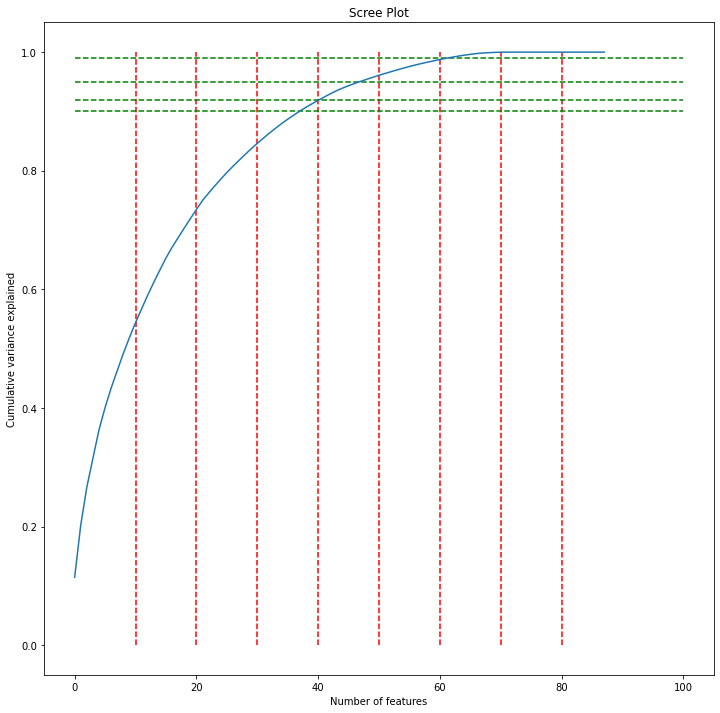

In [1216]:
# plot the scree plot to visualize the cumulative explained variance ratio by PCA 

fig = plt.figure(figsize=(12,12))
plt.vlines(x=[10,20,30,40,50,60, 70,80], ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=[0.90, 0.92, 0.95, 0.99], xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(cumu)
plt.xlabel("Number of features")
plt.ylabel("Cumulative variance explained")
plt.title("Scree Plot")
plt.show()

### Obseravtions : 

**From the scree plot, we can say that :**
1. 90% of the variance in the data can be explained by approx. 38 features 
2. 92% of the variance in the data can be explained by approx. 40 features 
3. 95% of the variance in the data can be explained by approx. 47 features
4. 99% of the variance in the data can be explained by approx. 60 features

In [1217]:
# lets consider 46 as the number of principal components which explain amost 95% of the variance. 
i_pca = PCA(n_components=46)


In [1218]:
# fit incremental PCA on x_train_scaled
x_train_pca = i_pca.fit_transform(x_train_scaled)

print(x_train_pca.shape)

(19751, 46)


In [1219]:
# applying the transformation of pca on test set as well. 

x_test_pca = i_pca.transform(x_test_scaled)
x_test_pca.shape

(8466, 46)

In [1220]:
# instantiate the logistic regression object
log_reg = LogisticRegression(class_weight='balanced')

In [1221]:
# fit the logistic regression model 
lr_model_pca = log_reg.fit(x_train_pca, y_train) 

In [1222]:
# make predictions on train set 
pred_probs_train = lr_model_pca.predict_proba(x_train_pca)
pred_train = pd.DataFrame(pred_probs_train)
pred_train = pred_train.iloc[:,[1]]
pred_train.reset_index(drop=True, inplace=True)



# make predictions on test set 
pred_probs_test = lr_model_pca.predict_proba(x_test_pca)
pred_test = pd.DataFrame(pred_probs_test)
pred_test = pred_test.iloc[:,[1]]
pred_test.reset_index(drop=True, inplace=True)

In [1223]:
# printing the head of pred_train
pred_train.head()

,1
0,0.605290
1,0.415452
2,0.621157
3,0.048668
4,0.467993


In [1224]:
# printing the head of pred_test

pred_test.head()

,1
0,0.831700
1,0.425654
2,0.734931
3,0.322328
4,0.491269


In [1225]:
# converting y_train to DF 
y_train_df = pd.DataFrame(y_train)
y_train_df.reset_index(drop=True, inplace=True)
y_train_df.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [1226]:
# converting y_test to DF 
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,churn
0,1
1,0
2,0
3,0
4,0


In [1227]:
# appending y_train_df and pred_probs_train

pred_train_final = pd.concat([y_train_df, pred_train], axis=1)
pred_train_final = pred_train_final.rename(columns={1:'Probability'})
pred_train_final = pred_train_final.reindex(['churn', 'Probability'], axis=1)

pred_train_final.head()

,churn,Probability
0,0,0.605290
1,0,0.415452
2,0,0.621157
3,0,0.048668
4,0,0.467993


In [1228]:
# appending y_test_df and pred_probs_test

pred_test_final = pd.concat([y_test_df, pred_test], axis=1)
pred_test_final = pred_test_final.rename(columns={1:'Probability'})
pred_test_final = pred_test_final.reindex(['churn', 'Probability'], axis=1)

pred_test_final.head()

,churn,Probability
0,1,0.831700
1,0,0.425654
2,0,0.734931
3,0,0.322328
4,0,0.491269


In [1229]:
# creating multiple columns with various thresholds ranging from 0-1 to get the optimum threshold

numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    pred_train_final[i]= pred_train_final.Probability.map(lambda x: 1 if x > i else 0)
pred_train_final.head()

,churn,Probability,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.605290,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1,0,0.415452,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.621157,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
3,0,0.048668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.467993,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [1230]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(pred_train_final.churn, pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.074072  1.000000  0.000000
0.05  0.05  0.083540  0.998633  0.010335
0.10  0.10  0.113615  0.993848  0.043198
0.15  0.15  0.162827  0.982912  0.097222
0.20  0.20  0.220850  0.965140  0.161308
0.25  0.25  0.295580  0.937799  0.244204
0.30  0.30  0.369855  0.912509  0.326444
0.35  0.35  0.450914  0.875598  0.416940
0.40  0.40  0.534808  0.831852  0.511045
0.45  0.45  0.622449  0.774436  0.610291
0.50  0.50  0.696876  0.698565  0.696741
0.55  0.55  0.757886  0.609706  0.769740
0.60  0.60  0.809124  0.523582  0.831966
0.65  0.65  0.854488  0.427888  0.888615
0.70  0.70  0.886892  0.321258  0.932141
0.75  0.75  0.907498  0.246070  0.960411
0.80  0.80  0.918232  0.175666  0.977636
0.85  0.85  0.922738  0.106630  0.988025
0.90  0.90  0.924460  0.058100  0.993766
0.95  0.95  0.925371  0.022556  0.997594


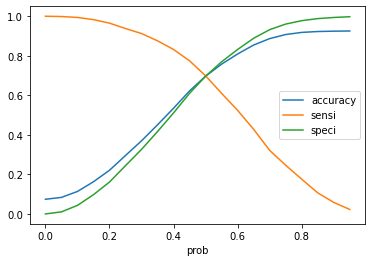

In [1231]:
#plotting a curve between acccuracy, sensitivity and specificity to find the intersecting point

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

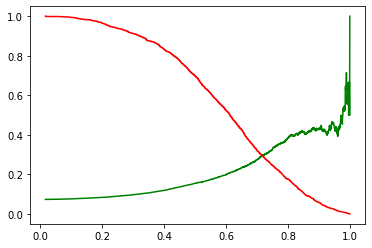

In [1232]:
# plotting the precision recall curve

p, r, thresholds = metrics.precision_recall_curve(pred_train_final.churn, pred_train_final.Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Since the accuracy spcificity and sensitivity are all considerable when the threshold is 0.5 we'll consider the probability as 0.5**

In [1233]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0 

pred_train_final['predicted'] = pred_train_final.Probability.map( lambda x: 1 if x > 0.5 else 0)

pred_test_final['predicted'] = pred_test_final.Probability.map( lambda x: 1 if x > 0.5 else 0)


In [1234]:
#printing the head of train data
pred_train_final.head()

,churn,Probability,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,predicted
0,0,0.605290,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1
1,0,0.415452,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.621157,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1
3,0,0.048668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.467993,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [1235]:
#printing the head of test data

pred_test_final.head()

,churn,Probability,predicted
0,1,0.831700,1
1,0,0.425654,0
2,0,0.734931,1
3,0,0.322328,0
4,0,0.491269,0


In [1236]:
# roc auc score of train set

"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.76'

In [1237]:
# roc auc score of test set

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.74'

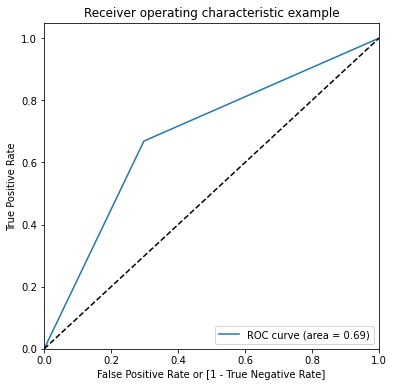

(array([0.        , 0.29775281, 1.        ]),
 array([0.        , 0.66876972, 1.        ]),
 array([2, 1, 0]))

In [1238]:
#plotting ROC curve

draw_roc(pred_test_final.churn, pred_test_final.predicted)

In [1239]:
# Confusion matrix 
confusion = metrics.confusion_matrix( pred_test_final.churn, pred_test_final.predicted )
confusion

array([[5500, 2332],
       [ 210,  424]])

In [1240]:
# Confusion matrix 
confusion = metrics.confusion_matrix( pred_train_final.churn, pred_train_final.predicted )
confusion

array([[12742,  5546],
       [  441,  1022]])

In [1241]:
# Predicted     not Churn  churn  __all__
# Actual
# not Churn     5501   2331     7832
# churn          213    421      634
# __all__       5714   2752     8466

In [1242]:
#Let's check the overall accuracy.
metrics.accuracy_score(pred_test_final.churn, pred_test_final.predicted)

0.6997401370186629

In [1243]:
#Let's check the overall accuracy.
metrics.accuracy_score(pred_train_final.churn, pred_train_final.predicted)

0.6968761075388588

In [1244]:
recall_score = metrics.recall_score(pred_test_final.churn, pred_test_final.predicted)
recall_score

0.668769716088328

In [1245]:
recall_score = metrics.recall_score(pred_train_final.churn, pred_train_final.predicted)
recall_score

0.6985645933014354

### Observations :

1. The accuracy score after applyin PCA remains almost similar to the previous model : 70%


2. The recall is also around 70%


3. Let's do a Random Forest Classifier to check if we can get any improvement 


### c. Simple Random Forest Classifier

In [1246]:
# creating a randomforest object considering the class imbalance

rf = RandomForestClassifier(n_estimators=10, max_depth=20, max_features=30, random_state=100, 
                            oob_score=True, class_weight='balanced')

In [1247]:
#fitting the train data

rf.fit(x_train, y_train)

rf.oob_score_

0.9092197863399322

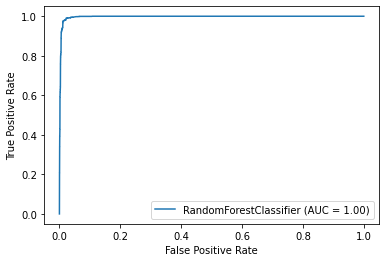

In [1248]:
#plotting roc_curve

metrics.plot_roc_curve(rf, x_train, y_train)
plt.show()

In [1249]:
#predicitng on test data
y_pred = rf.predict(x_test)

In [1250]:
#accuracy of the model on test data
metrics.accuracy_score(y_test,y_pred)

0.917198204583038

### c.  Random Forest Classifier with Hyperparameter Tuning

In [1251]:
### Hyper-parameter tuning for the Random Forest

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [100,200],
    'max_features':[30,40],
    'n_estimators': [50]
}

In [1252]:
#instantiating a grid_seach_cv object with 3 folds and accuracy for scoring

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")

In [1253]:
#fitting the model on train data

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   21.6s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [30, 40],
                         'min_samples_leaf': [100, 200], 'n_estimators': [50]},
             scoring='recall', verbose=1)

In [1254]:
#printing the accuracy score of the best fit model

grid_search.best_score_

0.6062978983628998

In [1255]:
#preserving the best fit model in rf_best

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=40,
                       min_samples_leaf=200, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [1256]:
#instantitatin the RandomForestClassifier with best fit parameters

rf_best = RandomForestClassifier(max_depth=15, max_features=40, min_samples_leaf=200,
                       n_estimators=50, n_jobs=-1, random_state=42, oob_score=True, class_weight='balanced')

#fitting the model on train data
rf_best.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=40,
                       min_samples_leaf=200, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42)

In [1257]:
#printing the oob score for the model
rf_best.oob_score_

0.7687205711103235

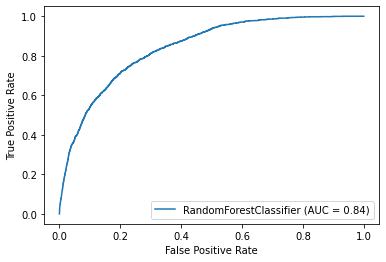

In [1258]:
#plotting the roc curve for train data

metrics.plot_roc_curve(rf_best, x_train, y_train)
plt.show()

In [1259]:
#predicting using the test data

predicted_rf = rf_best.predict(x_test)

In [1260]:
#creating a data frame with y_actual and y_predicted

y_test.reset_index(drop=True,inplace=True)
rf_df = pd.DataFrame({"y_actual":pd.Series(y_test),"y_predicted":pd.Series(predicted_rf)})

In [1261]:
#printing the head
rf_df.head()

,y_actual,y_predicted
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [1262]:
#Let's check the overall accuracy.
metrics.accuracy_score(rf_df.y_actual, rf_df.y_predicted)

0.7782896291046539

In [1263]:
#printing the recall score of model on test data

metrics.recall_score(rf_df.y_actual, rf_df.y_predicted)

0.5678233438485805

In [1264]:
#retrieving feature importances and storing in a data frame

rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False,inplace=True)

In [1265]:
#printing the feature importances
imp_df

,Varname,Imp
9,roam_og_mou_7,0.101440
41,loc_ic_t2f_mou_7,0.095912
84,days_since_last_rech_data,0.055775
83,days_since_last_rech_calls,0.053742
43,loc_ic_mou_7,0.052731
80,aon,0.052724
15,loc_og_t2f_mou_7,0.048039
26,std_og_mou_6,0.041972
39,loc_ic_t2m_mou_7,0.036295
19,loc_og_mou_7,0.031747


### The top 10 important features to consider when dealing with the customer churn use case

In [1266]:
imp_df[0:10]

,Varname,Imp
9,roam_og_mou_7,0.101440
41,loc_ic_t2f_mou_7,0.095912
84,days_since_last_rech_data,0.055775
83,days_since_last_rech_calls,0.053742
43,loc_ic_mou_7,0.052731
80,aon,0.052724
15,loc_og_t2f_mou_7,0.048039
26,std_og_mou_6,0.041972
39,loc_ic_t2m_mou_7,0.036295
19,loc_og_mou_7,0.031747


# <font color='Blue'>Conclusion</font>

1. The top 10 attributes which are significant 

In [1267]:
top10 = list(imp_df[0:10]['Varname'])

In [1268]:
top10

['roam_og_mou_7',
 'loc_ic_t2f_mou_7',
 'days_since_last_rech_data',
 'days_since_last_rech_calls',
 'loc_ic_mou_7',
 'aon',
 'loc_og_t2f_mou_7',
 'std_og_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_og_mou_7']

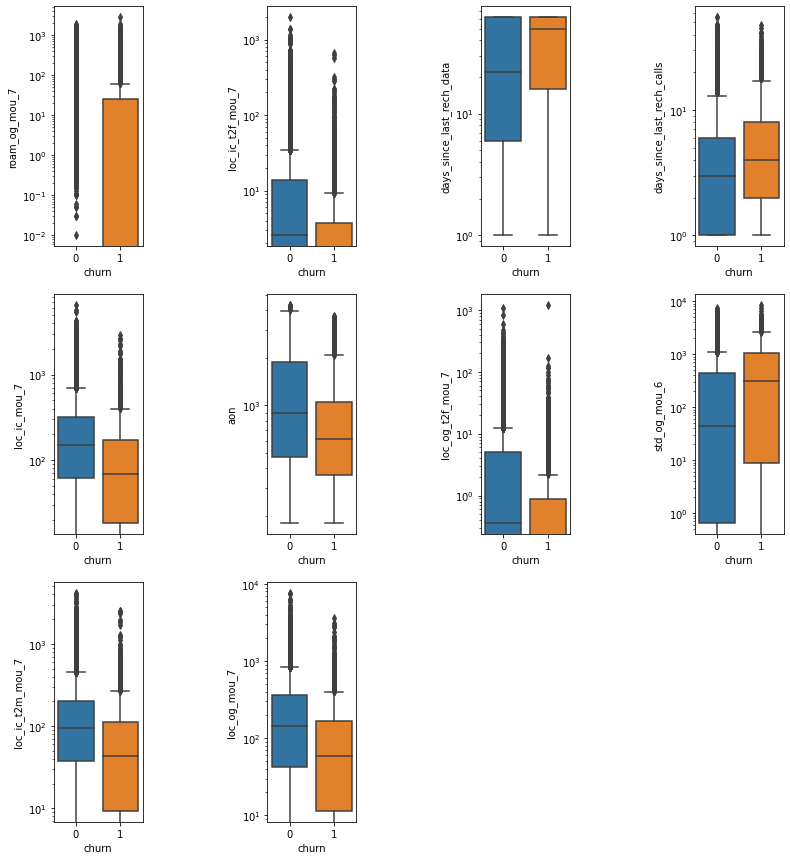

In [1269]:
k=1
plt.figure(figsize=(15,15))
for i in top10:
        
    plt.subplot(3,8,k)
    sns.boxplot(x = 'churn', y =i, data = churn_data)
    plt.yscale('log')
    k=k+2

plt.show()

**1. The top 10 variables which we should consider when predicting churn customers are :**

    a.'roam_og_mou_7',
 
    b.'loc_ic_t2f_mou_7'
    
    c.'days_since_last_rech_data'
    
    d.'days_since_last_rech_calls'
    
    e.'loc_ic_mou_7'
   
    f.'aon'
    
    g.'loc_og_t2f_mou_7'
    
    h.'std_og_mou_6'
    
    i.'loc_ic_t2m_mou_7'
    
    j.'loc_og_mou_7'
    
    
**2. The following are the actionable items :**

    a. We need to revisit the roaming charges, as the customers who have more minutes of usage when they 
       are roaming tend to churn.
    
    b. We also need to consider the local, STD, incoming and outgoing minutes of usage for every customer 
       and compare it with the previous month, as among the customers where there's decline in minutes of useage,
       they tend to churn as well. 
       
    C. The obvoius signs of customer churning would be the days since the customer has rechared for the last time, 
       we can clearly see that among all the churn customers the days since last recharge is higher than when 
       compared with those who haven't churned 

**3. The following actions can be taken to make sure that the churn percentage gets better :**

    a. For the customers who are frequently in the roaming zone we can reconsider their charges as they seem to
       churn more often than not.
     
    b. For those customers where there is a dip in the minutes of usage both for incoming or outgoing minutes of 
       usage, we can retain them by rolling out offers, discounts, coupons or any other perks by doing more
       indepth data analysis on the individual behaviour of the customer. Same applies to those who haven't
       recharged for more than a month. We can also seek regular feedback and keep improving our service.
       
    c. We can see that the customers who have been using the services for a longer period of time have less 
       tendency to churn. So observing the behavior of the new customers who take the service will be very crucial.

